# GooglePlay Project:

# Group 2


### Name of students:

יאיר עוגן

הוד גיספאן

דניאל חתוכה





<div>
<img src="https://github.com/Yairvedaniel/project1/blob/main/PHOTO-2024-06-05-14-34-50.jpg?raw=true" width="400"/>
</div>



<a id="top"></a>
# Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)

    2.1 [Checking Values](#checking-Values)
3. [Paid Apps vs Free Apps](#paid-apps-vs-free-apps)

4. [גודל האפליקציה](#גודל-האפליקציה)

5. [קטגוריות האפליקציה](#קטגוריות-האפליקציה)

<a id="introduction"></a>
## 1.Introduction:

[back to top](#top)

### information on tha data
We'll work with a dataset, based on [Google Play Store](https://play.google.com/store/apps)

The source of the data file  [here](https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [2]:
url = 'https://raw.githubusercontent.com/Yairvedaniel/project1/main/googleplaystore_%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98%20%D7%A2%D7%95%D7%92%D7%9F%20%D7%95%D7%93%D7%A0%D7%99%D7%90%D7%9C.csv'
apps = pd.read_csv(url)
apps.head()

Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1     159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9     967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7   87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5  215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3     967  2.8M     100,000+  Free     0   

  Content Rating                     Genres Last Updated         Current Ver  \
0       Everyone               Art & Design     7-Jan-18               1.0.0   
1       Everyone  Art & Design;Pretend Play    15-Jan-18               2.0.0   
2       Everyone               Art & Design     1-Aug-18               1.2.4   
3           Teen               Art & Design     8-Jun-18  Varies with device   
4       Everyone    Art & Design;Creativity    20-Jun-18                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
apps.shape

(10841, 14)

In [5]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

<a id="data-cleaning-and-preprocessing"></a>
## 2.Data Cleaning and Preprocessing:

[back to top](#top)


הסרת עמודה מיותרת

In [6]:
apps = apps.drop('Unnamed: 0', axis=1)
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<a id='checking-Values'></a>
#### 2.1 checking values
[back to top](#top)

בדיקת כפילויות

In [7]:
apps.duplicated().sum()

483

In [8]:

apps.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [9]:
apps.duplicated().sum()

0

In [10]:
apps.shape

(10350, 13)

In [11]:
missing_data = apps.isnull().sum()
print("Missing data before handling:")
print(missing_data)

Missing data before handling:
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


הסרת שורות בעלות ערכים חסרים בודדים

In [12]:
apps = apps.dropna(subset=['Current Ver'])
apps = apps.dropna(subset=['Android Ver'])
apps = apps.dropna(subset=['Content Rating'])
apps = apps.dropna(subset=['Type'])

In [13]:
apps.shape

(10338, 13)

ישנו ערך קטגורי החוזר על עצמו במקרים רבים בעמודות מספריות. לאחר חשיבה בנוגע לנחיצותו בניתוח הנתונים - החלטנו להמיר אותו ב NaN

In [14]:
apps.replace('Varies with device', np.nan, inplace=True)


הסרת תווים מיוחדים מעמודות מספריות

In [15]:

cols = ['Installs','Price']
chars = ['+',",","$"]
for col in cols:   
    for char in chars:
            apps[col] = apps[col].apply(lambda c: c.replace(char, ''))


In [16]:
def size_to_mb(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', ''))
        elif 'k' in size:
            return float(size.replace('k', '')) / 1000
    return None

apps.loc[:, 'Size_MB'] = apps['Size'].apply(size_to_mb)

print(apps[['Size', 'Size_MB']].head())


   Size  Size_MB
0   19M     19.0
1   14M     14.0
2  8.7M      8.7
3   25M     25.0
4  2.8M      2.8


In [17]:
apps = apps.drop('Size', axis=1)

In [18]:
missing_data = apps.isnull().sum()
print("Missing data before handling:", "\n")
print(missing_data)

Missing data before handling: 

App                  0
Category             0
Rating            1460
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1301
Android Ver       1220
Size_MB           1524
dtype: int64


In [19]:
apps.Reviews = pd.to_numeric(apps.Reviews, errors='coerce')
apps.Price = pd.to_numeric(apps.Price, errors='coerce')
apps.Rating = pd.to_numeric(apps.Rating, errors='coerce')
apps.Installs = pd.to_numeric(apps.Installs, errors='coerce') 
apps.Size_MB = pd.to_numeric(apps.Size_MB, errors='coerce') 
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [20]:
rate_apps = apps.dropna(subset=['Rating']).copy()
size_apps = apps.dropna(subset=['Size_MB']).copy()

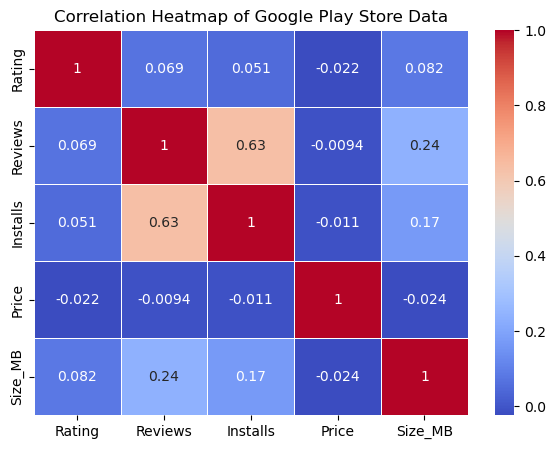

In [21]:
# סינון העמודות המספריות בלבד
numeric_apps = apps.select_dtypes(include=[np.number])

# יצירת מטריצת קורלציה עבור העמודות המספריות
correlation_matrix = numeric_apps.corr()

# יצירת מפת חום
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Google Play Store Data')
plt.show()

כפי שניתן לראות אין קורולציות חזקות בין הנתונים.

נצלול קצת יותר לנתונים עצמם

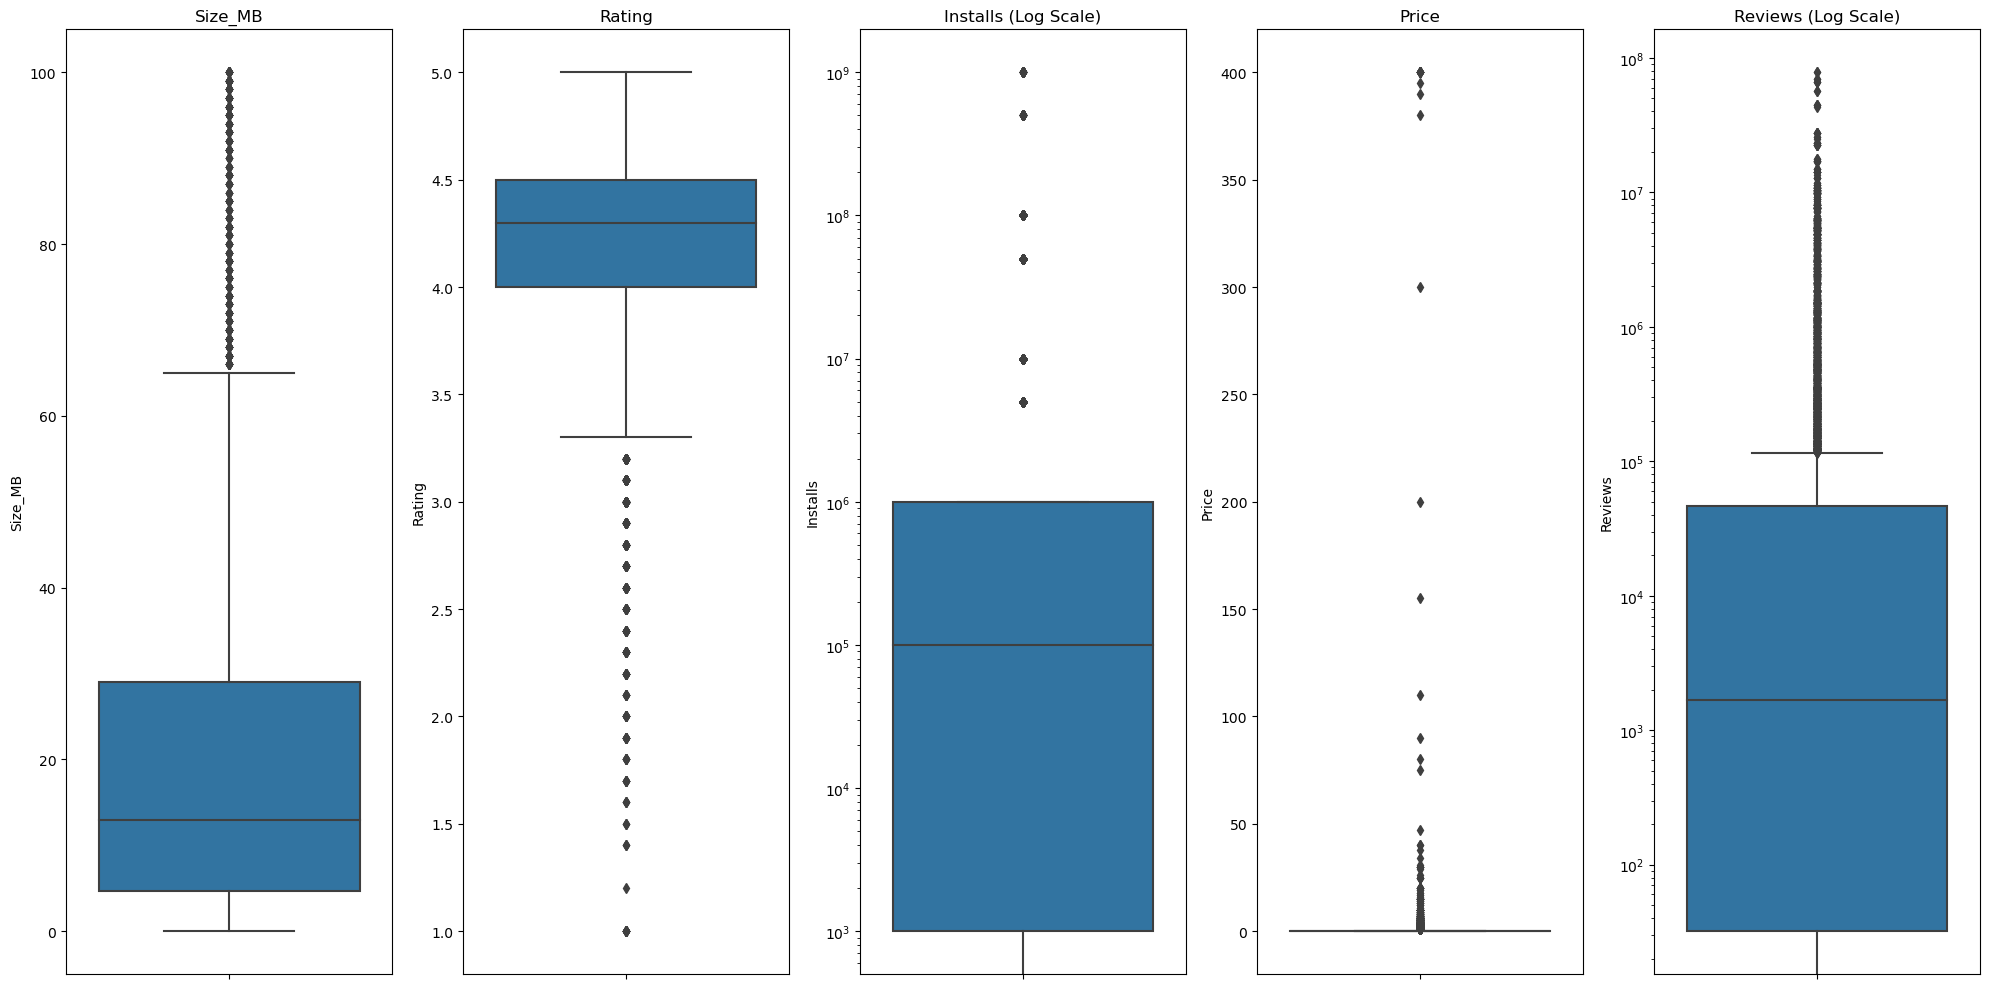

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10))


sns.boxplot(data=apps, y='Size_MB', ax=axes[0])
axes[0].set_title('Size_MB')


sns.boxplot(data=apps, y='Rating', ax=axes[1])
axes[1].set_title('Rating')


sns.boxplot(data=apps, y='Installs', ax=axes[2])
axes[2].set_yscale('log')
axes[2].set_title('Installs (Log Scale)')


sns.boxplot(data=apps, y='Price', ax=axes[3])
axes[3].set_title('Price')


sns.boxplot(data=apps, y='Reviews', ax=axes[4])
axes[4].set_yscale('log')
axes[4].set_title('Reviews (Log Scale)')

plt.tight_layout()
plt.show()

<a id="paid-apps-vs-free-apps"></a>
## 3.Paid Apps vs Free Apps:

[back to top](#top)

בדיקת הקשרים בין אפליקציות בתשלום\חינמיות אל מול שאר הנתונים

In [23]:

free_apps = apps[apps['Price'] == 0].copy()
paid_apps = apps[apps['Price'] > 0].copy()

# Calculate revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

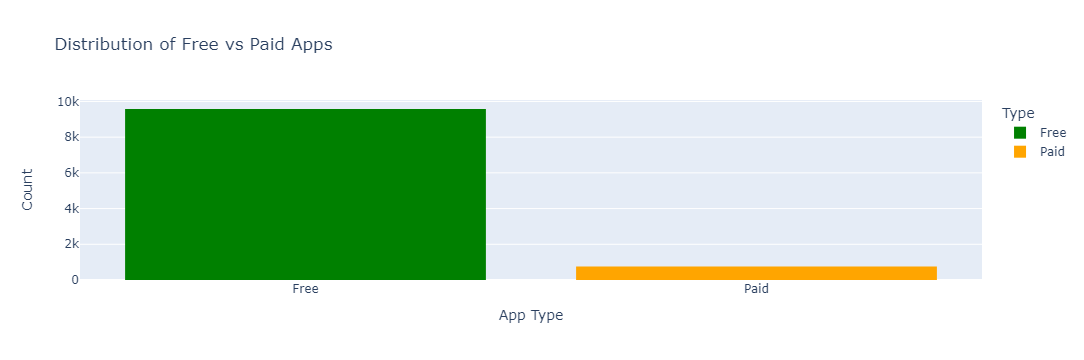

In [24]:
fig = px.histogram(apps, x='Type', color='Type', color_discrete_map={'Free': 'green', 'Paid': 'orange'}, title='Distribution of Free vs Paid Apps')

# הגדרת שמות צירים
fig.update_layout(
    xaxis_title='App Type',
    yaxis_title='Count'
)

# הצגת הגרף
fig.show()

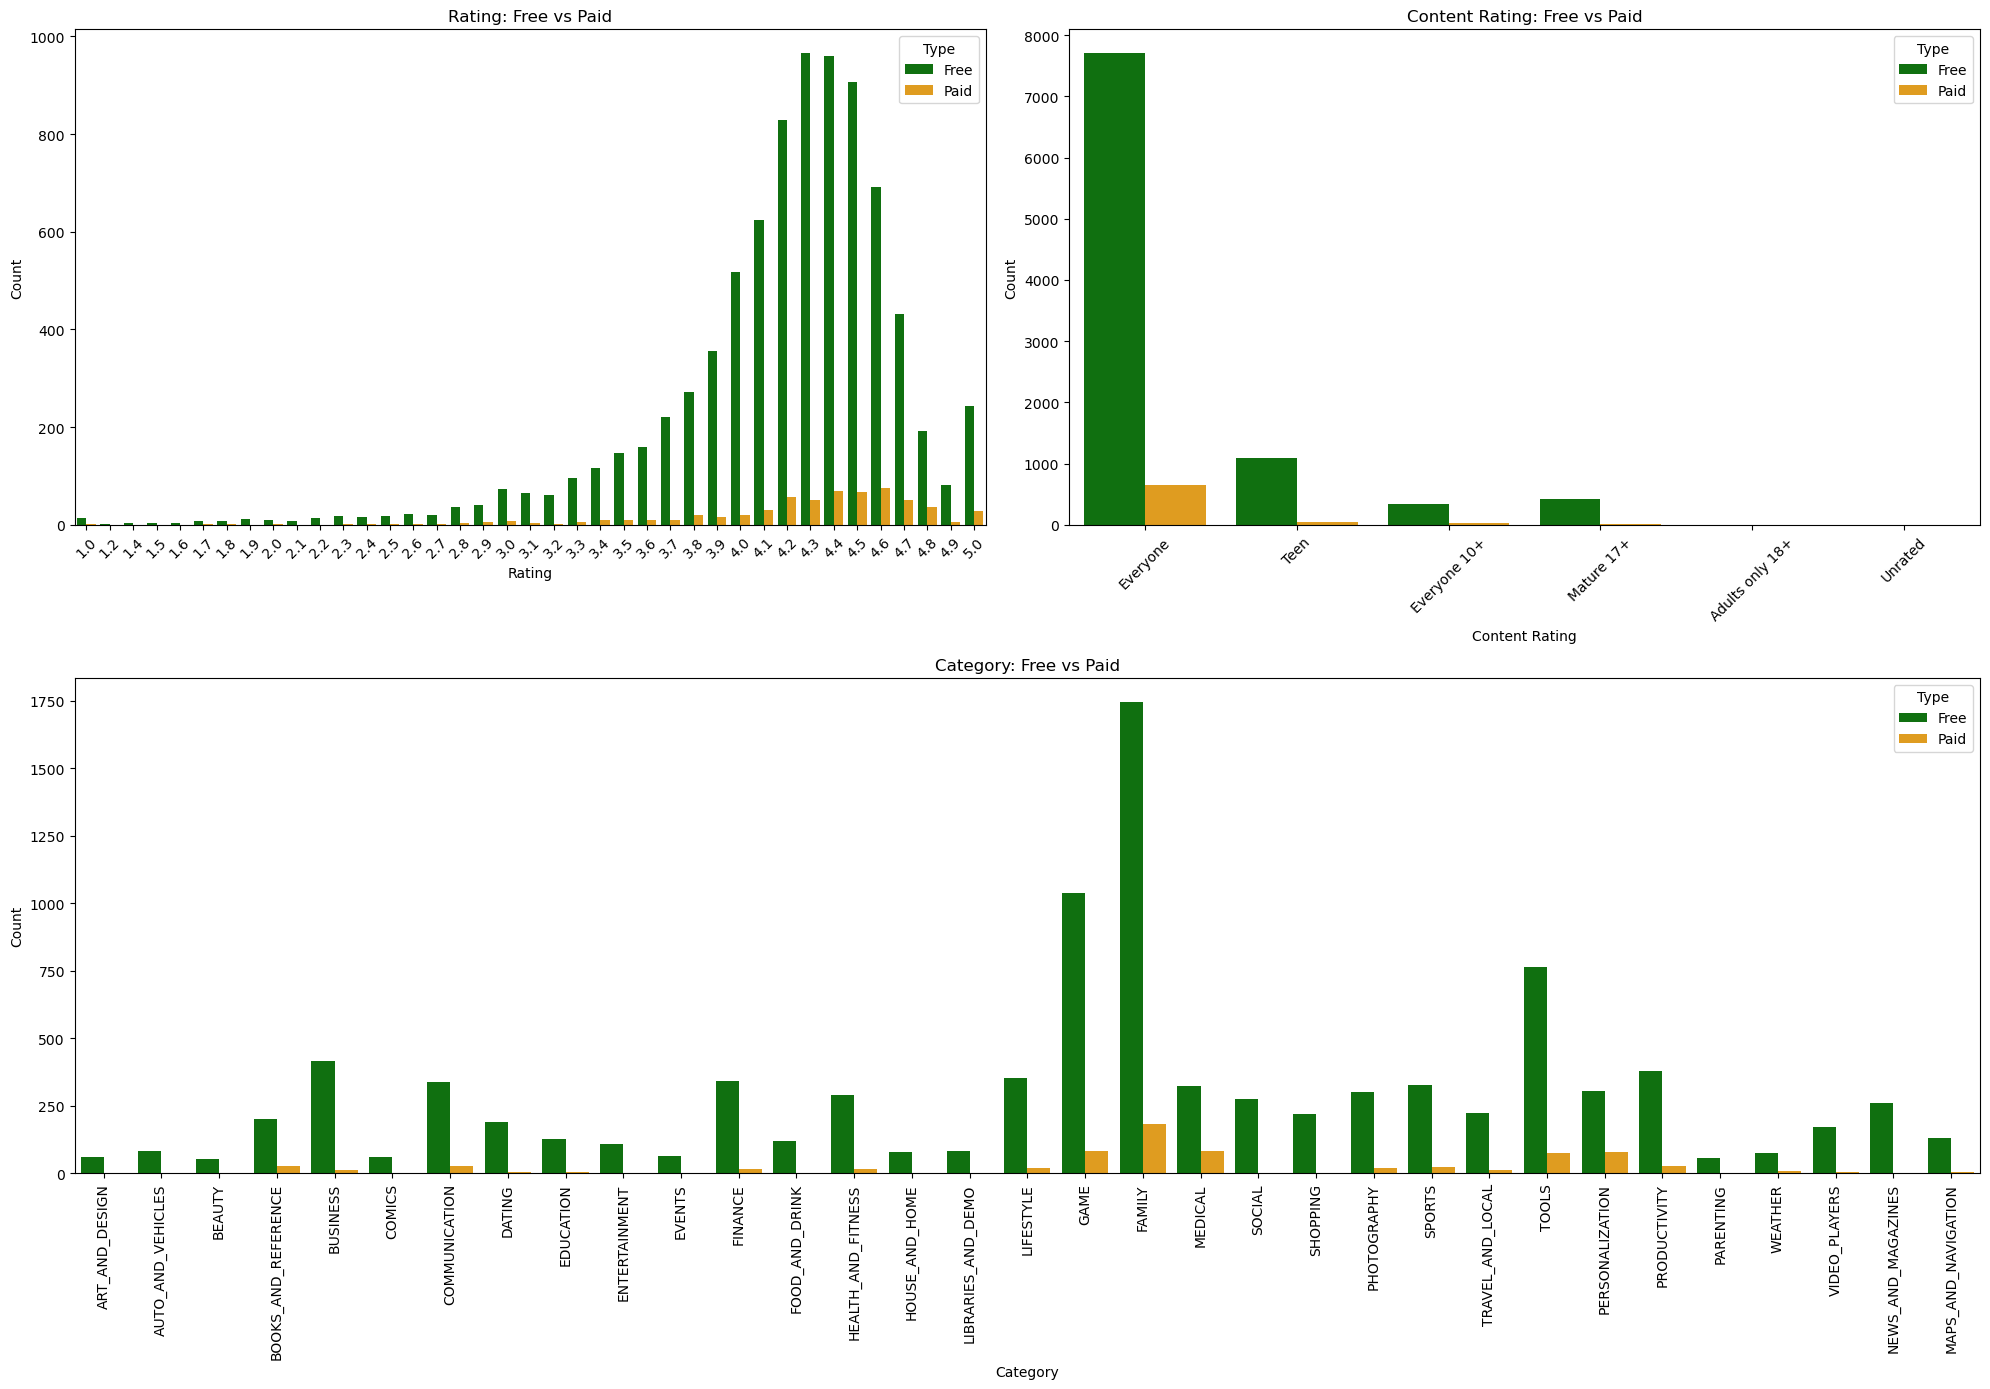

In [25]:
palette = {'Free': 'green', 'Paid': 'orange'}
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.countplot(x='Rating', hue='Type', data=apps, palette=palette, ax=ax1).set(title='Rating: Free vs Paid', xlabel='Rating', ylabel='Count')
sns.countplot(x='Content Rating', hue='Type', data=apps, palette=palette, ax=ax2).set(title='Content Rating: Free vs Paid', xlabel='Content Rating', ylabel='Count')
sns.countplot(x='Category', hue='Type', data=apps, palette=palette, ax=ax3).set(title='Category: Free vs Paid', xlabel='Category', ylabel='Count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

ניתן לראות את הקשר בין האפליקציות בחינם\בתשלום - לבין משתנים אחרים.

כגון הקטגוריות השונות, דירוג האפליקציה, סיווג האפליקציה על פי גילאים שונים. 

### נתרכז יותר בהבדל בין דירוגי וביקורות האפליקציה

In [26]:
average_rating_paid = apps[apps['Type'] == 'Paid']['Rating'].mean()
average_rating_free = apps[apps['Type'] == 'Free']['Rating'].mean()

print(f'The average rating of paid apps is: {round(average_rating_paid, 2)}')
print(f'The average rating of free apps is: {round(average_rating_free, 2)}')

The average rating of paid apps is: 4.26
The average rating of free apps is: 4.18


ההבדל אמנם קטן, אך ניתן לראות כי בממוצע דירגו באופן גבוה אפליקציות בתשלום.

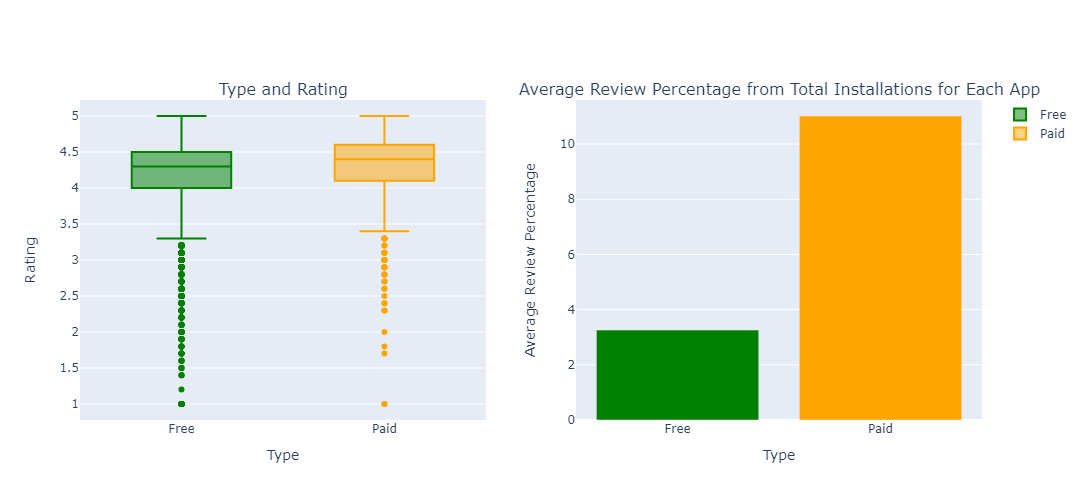

In [27]:

# סינון נתונים וחישוב אחוז הביקורות
filtered_apps = apps.dropna(subset=['Reviews', 'Installs'])
filtered_apps = filtered_apps[filtered_apps['Installs'].apply(lambda x: isinstance(x, (int, float))) & filtered_apps['Reviews'].apply(lambda x: isinstance(x, (int, float)))]

review_percentage = (filtered_apps['Reviews'] / filtered_apps['Installs']) * 100
filtered_apps = filtered_apps[review_percentage.apply(lambda x: isinstance(x, (int, float)))]

# חישוב אחוז הביקורות הממוצע לפי סוג האפליקציה
average_review_percentage = filtered_apps.groupby('Type').apply(lambda x: (x['Reviews'] / x['Installs']).mean() * 100)

# יצירת תת-גרפים
fig = make_subplots(rows=1, cols=2, subplot_titles=('Type and Rating', 'Average Review Percentage from Total Installations for Each App'))

# הוספת גרפים
fig.add_trace(go.Box(y=filtered_apps['Rating'][filtered_apps['Type'] == 'Free'], name='Free', marker_color='green'), row=1, col=1)
fig.add_trace(go.Box(y=filtered_apps['Rating'][filtered_apps['Type'] == 'Paid'], name='Paid', marker_color='orange'), row=1, col=1)
fig.add_trace(go.Bar(x=average_review_percentage.index, y=average_review_percentage.values, marker_color=['green', 'orange'], showlegend=False), row=1, col=2)

# עדכון עיצוב
fig.update_layout(height=500, width=1070, showlegend=True)
fig.update_xaxes(title_text='Type', row=1, col=1)
fig.update_yaxes(title_text='Rating', row=1, col=1)
fig.update_xaxes(title_text='Type', row=1, col=2)
fig.update_yaxes(title_text='Average Review Percentage', row=1, col=2)
fig.update_layout(legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.02))

# הצגת הגרפים
fig.show()


Correlation between Review Percentage and Rating for Paid Apps: 0.2179297633035143


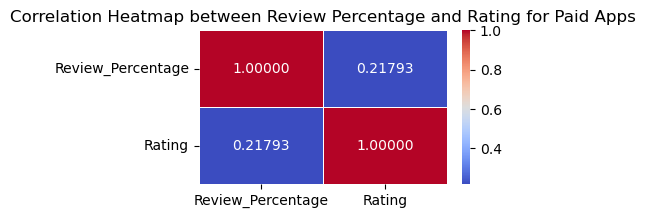

In [28]:

# חישוב אחוז הביקורות מתוך התקנות עבור כל אפליקציה
paid_apps['Review_Percentage'] = (paid_apps['Reviews'] / paid_apps['Installs']) * 100

# הסרת ערכים חסרים והמרת ערכים לא מספריים לערכי NaN
paid_apps['Review_Percentage'] = pd.to_numeric(paid_apps['Review_Percentage'], errors='coerce')
paid_apps['Rating'] = pd.to_numeric(paid_apps['Rating'], errors='coerce')

# הסרת שורות עם ערכים חסרים בעמודות הרלוונטיות
paid_apps = paid_apps.dropna(subset=['Review_Percentage', 'Rating'])

# חישוב הקורלציה בין אחוז הביקורות לדירוג האפליקציה
correlation = paid_apps['Review_Percentage'].corr(paid_apps['Rating'])

print("Correlation between Review Percentage and Rating for Paid Apps:", correlation)

correlation_matrix = paid_apps[['Review_Percentage', 'Rating']].corr()

# הצגת מפת חום של הקורלציה
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.5f')
plt.title('Correlation Heatmap between Review Percentage and Rating for Paid Apps')
plt.show()



### תובנה 1:


ניתן לראות כי אחוז המשתמשים הפעילים בכתיבת ביקורות היה גבוה יותר עבור אפליקציות בתשלום, בהשוואה לאפליקציות חינמיות. 

נוסף על כך, הדירוג הממוצע של אפליקציות בתשלום היה גבוה יותר מזה של אפליקציות חינמיות

לסיכום, קיימת **מעורבות רבה יותר**(מבחינת ביקורות) מצד משתמשים באפליקציות בתשלום, ועם זאת, הם נוטים להעניק **דירוגים גבוהים יותר** לאפליקציות אלה.

בנוסף ישנה קורלציה קלה בין אחוז הביקורות לאפליקציה לבין הדירוג שלה.. 

<a id="גודל-האפליקציה"></a>
## 4. הקשר בין גודל האפליקציה לרווחיות שלה:

[back to top](#top)


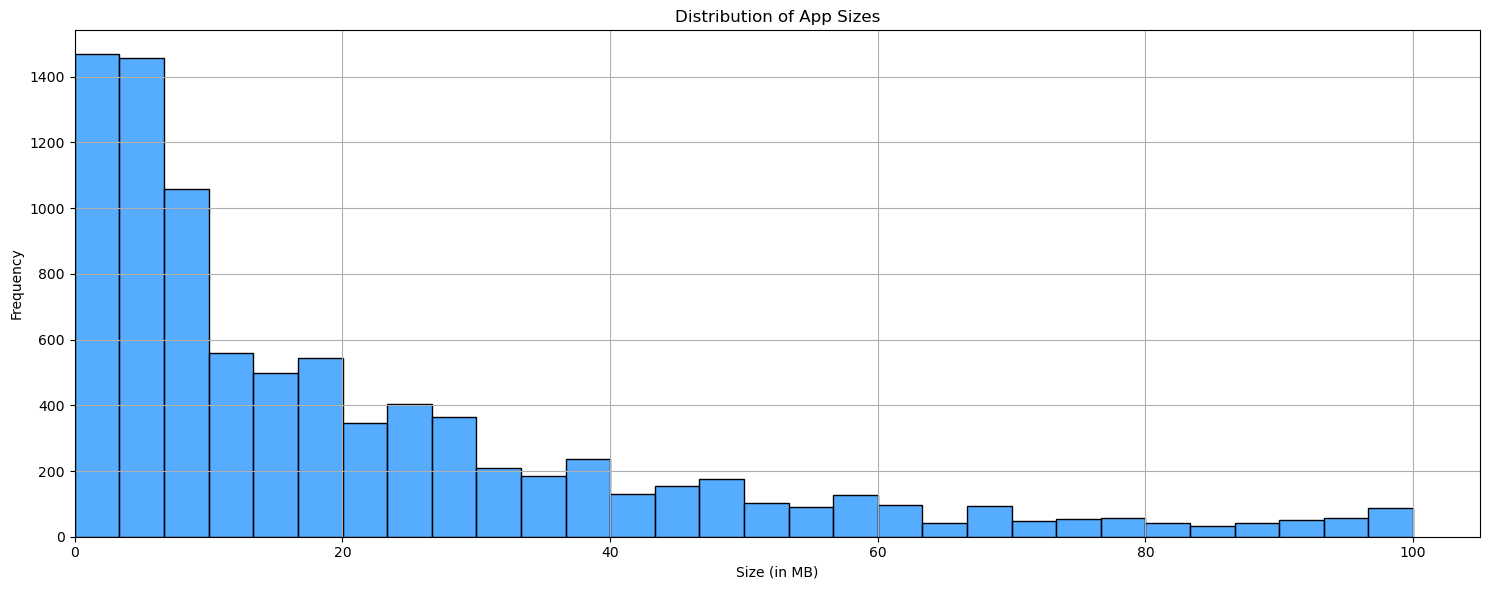

In [29]:
plt.figure(figsize=(15, 6))
sns.histplot(apps['Size_MB'], bins=30, color='dodgerblue')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (in MB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

# Set the x and y axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

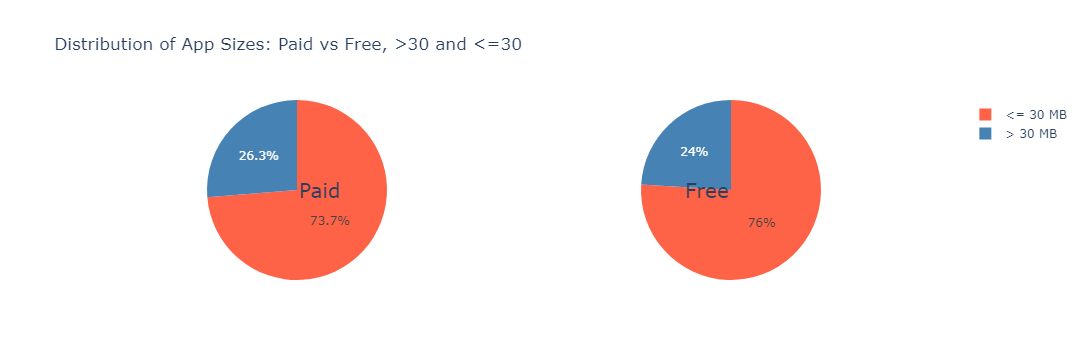

In [30]:

# חישוב מספר האפליקציות לפי קטגוריות גודל (<= 30 MB ו- > 30 MB)
size_counts = {
    'Paid': [paid_apps[paid_apps['Size_MB'] <= 30].shape[0], paid_apps[paid_apps['Size_MB'] > 30].shape[0]],
    'Free': [free_apps[free_apps['Size_MB'] <= 30].shape[0], free_apps[free_apps['Size_MB'] > 30].shape[0]]
}

# יצירת גרף עוגה באמצעות Plotly
fig = go.Figure()
for i, (app_type, counts) in enumerate(size_counts.items()):
    fig.add_trace(go.Pie(labels=['<= 30 MB', '> 30 MB'], values=counts, name=app_type,
                         marker_colors=['#FF6347', '#4682B4'], domain={'x': [i*0.5, (i+1)*0.5]}))

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Distribution of App Sizes: Paid vs Free, >30 and <=30',
                  annotations=[dict(text=key, x=(i*0.5 + (i+1)*0.5)/2, y=0.5, font_size=20, showarrow=False)
                               for i, key in enumerate(size_counts.keys())])

# הצגת הגרף
fig.show()


ניתן לראות כי קרוב ל-80% מהאפליקציות הן בעלות נפח אחסון קטן (<= 30 MB).

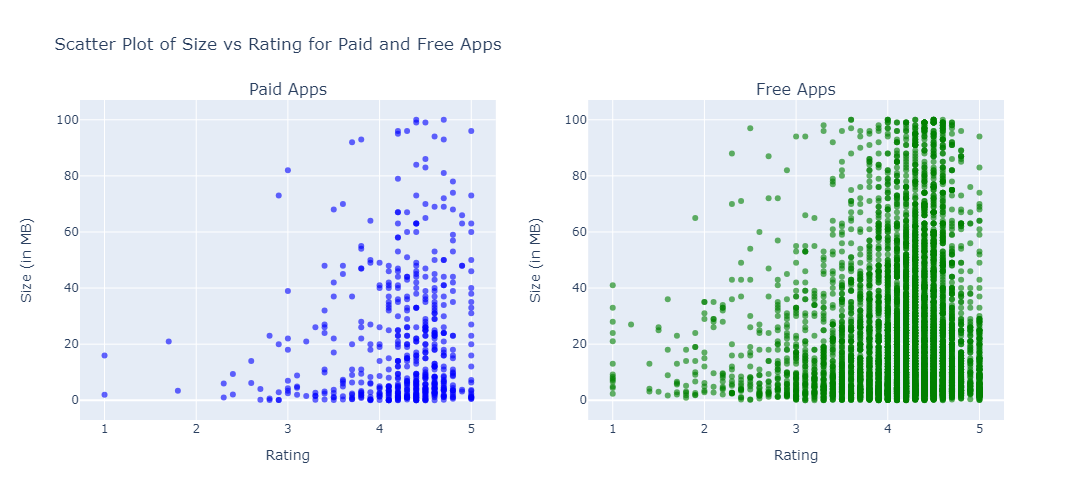

In [31]:

# יצירת גרפים כפולים עם Plotly
fig = make_subplots(rows=1, cols=2, subplot_titles=("Paid Apps", "Free Apps"))

# פונקציה ליצירת גרף פיזור
def add_scatter_trace(fig, apps_data, row, col, color, name):
    fig.add_trace(go.Scatter(x=apps_data['Rating'], y=apps_data['Size_MB'], mode='markers',
                             marker=dict(color=color, opacity=0.6), name=name), row=row, col=col)
    fig.update_xaxes(title_text='Rating', row=row, col=col)
    fig.update_yaxes(title_text='Size (in MB)', row=row, col=col)

# הוספת גרפים
add_scatter_trace(fig, paid_apps, 1, 1, 'blue', 'Paid Apps')
add_scatter_trace(fig, free_apps, 1, 2, 'green', 'Free Apps')

# עדכון פרטי התצוגה של הגרפים
fig.update_layout(title_text='Scatter Plot of Size vs Rating for Paid and Free Apps',
                  width=1100, height=500, showlegend=False)

# הצגת הגרף
fig.show()

ניתן לראות כי ישנו ריכוז ברור של אפליקציות בתשלום בגודל קטן(<= 30) בעלות דירוג יחסית גבוה.
לעומת זאת - בגרף האפליקציות החינמיות נראה פיזור רחב יותר של הדירוגים בין הגדלים השונים.  

Size Category        Revenue
1         30MB+  273006.054545
0        0-30MB  418080.820150

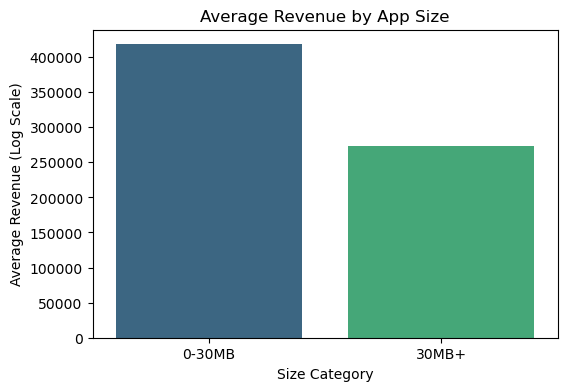

In [71]:
size_bins = [0, 30, float('inf')]
size_labels = ['0-30MB', '30MB+']
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

# Calculate average revenue per size category
avg_revenue_by_size = paid_apps.groupby('Size Category')['Revenue'].mean().reset_index().sort_values(by='Revenue')
display(avg_revenue_by_size)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_revenue_by_size, x='Size Category', y='Revenue', palette='viridis')
plt.title('Average Revenue by App Size')
plt.xlabel('Size Category')
plt.ylabel('Average Revenue (Log Scale)')
plt.show()

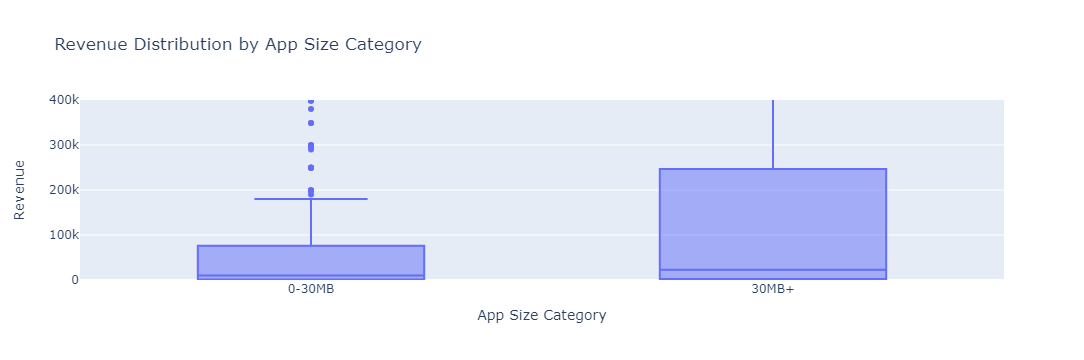

In [75]:

# יצירת קטגוריות גודל
size_bins = [0, 30, float('inf')]
size_labels = ['0-30MB', '30MB+']
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

# יצירת גרף הבוקספלוט לעמודת הרווח לפי קטגוריות גודל
fig_box = px.box(paid_apps, x='Size Category', y='Revenue', title='Revenue Distribution by App Size Category', labels={'Revenue': 'Revenue', 'Size Category': 'App Size Category'})
fig_box.update_layout(yaxis_title='Revenue', xaxis_title='App Size Category', showlegend=False, yaxis_range=[0, 400000])

# הצגת הגרף
fig_box.show()


### תובנה 2:

רוב האפליקציות - בעלות גודל קטן הן בתשלום והן בחינם  

אם נתמקד בדירוג אפליקציות בתשלום, ניתן לראות באופן ברור וחד יותר כי ישנה **העדפת משתמש** לאפליקציות **קלות משקל** לעומת אפליקציות כבדות משקל. באפליקציות חינמיות ראינו פיזור רחב יותר

בנוסף, **ההכנסה הממוצעת** לאפליקצייה קלת משקל **גבוהה יותר** 


<a id="קטגוריות-האפליקציה"></a>
## 5. קטגוריות האפליקציה:

[back to top](#top)



Number of categories =  33


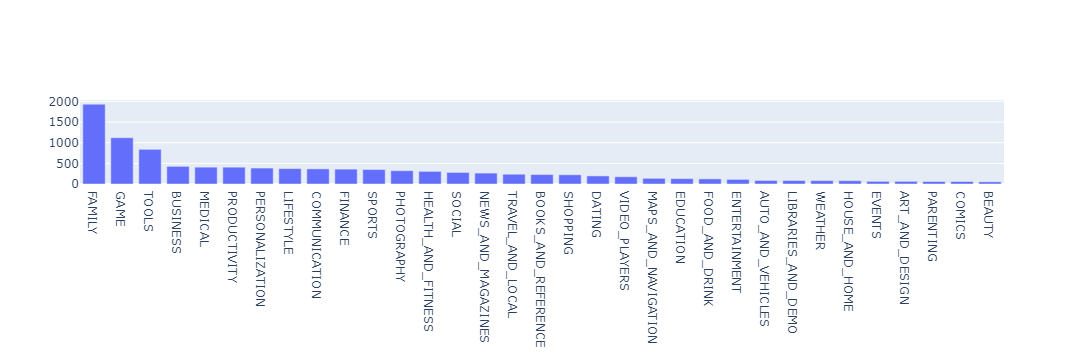

In [34]:

num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)


num_apps_in_category = apps["Category"].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

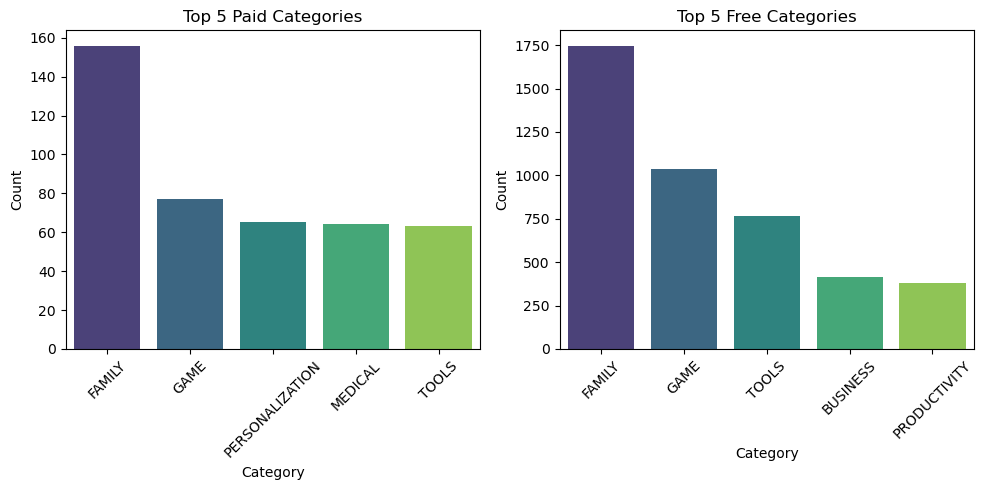

In [35]:

# מציאת ה-5 קטגוריות התכופות ביותר שבתשלום
top_5_paid_categories = paid_apps['Category'].value_counts().head(5)

# מציאת ה-5 קטגוריות התכופות ביותר בחינם
top_5_free_categories = free_apps['Category'].value_counts().head(5)

# קביעת גודל התמונה
plt.figure(figsize=(10, 5))

# subplot עבור גרף הקטגוריות בתשלום
plt.subplot(1, 2, 1)
sns.countplot(data=paid_apps, x='Category', order=top_5_paid_categories.index, palette='viridis')
plt.title('Top 5 Paid Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# subplot עבור גרף הקטגוריות בחינם
plt.subplot(1, 2, 2)
sns.countplot(data=free_apps, x='Category', order=top_5_free_categories.index, palette='viridis')
plt.title('Top 5 Free Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)

# תצוגת הגרפים
plt.tight_layout()
plt.show()


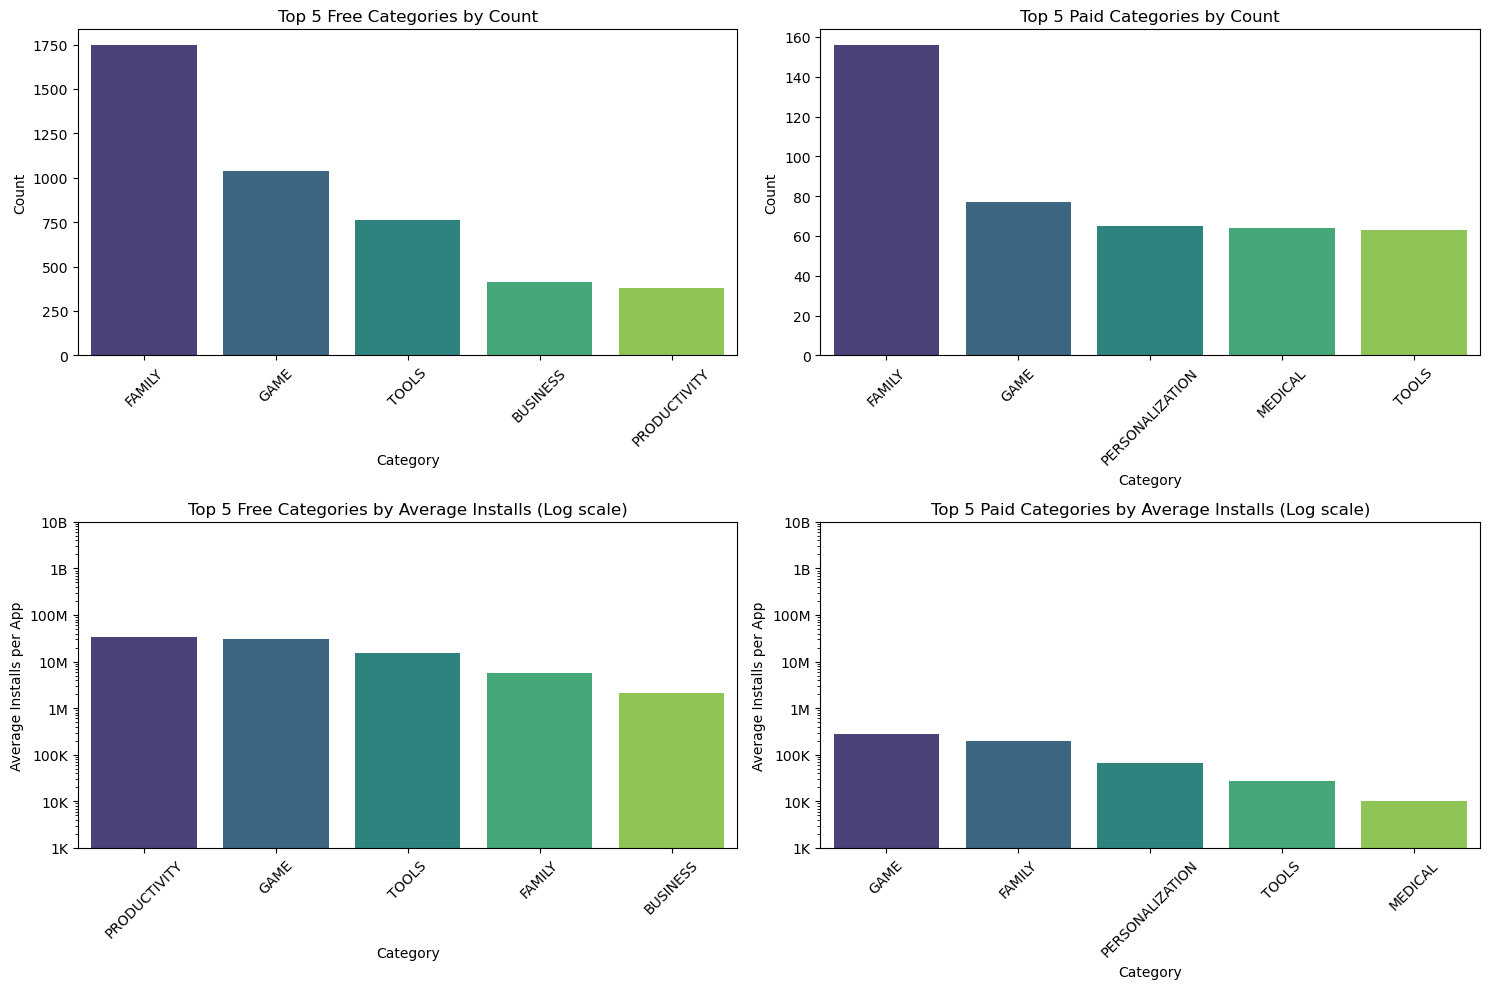

In [36]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot top 5 free categories by count
sns.countplot(data=free_apps_top_5, x='Category', order=top_5_free_categories, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Top 5 Free Categories by Count')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Plot top 5 paid categories by count
sns.countplot(data=paid_apps_top_5, x='Category', order=top_5_paid_categories, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Top 5 Paid Categories by Count')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot top 5 free categories by average installs with log scale
sns.barplot(data=top_5_free_installs_avg, x='Category', y='Installs', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Top 5 Free Categories by Average Installs (Log scale)')
axes[1, 0].set_ylabel('Average Installs per App')
axes[1, 0].set_yscale('log')
axes[1, 0].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 0].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plot top 5 paid categories by average installs with log scale
sns.barplot(data=top_5_paid_installs_avg, x='Category', y='Installs', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Top 5 Paid Categories by Average Installs (Log scale)')
axes[1, 1].set_ylabel('Average Installs per App')
axes[1, 1].set_yscale('log')
axes[1, 1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1, 1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


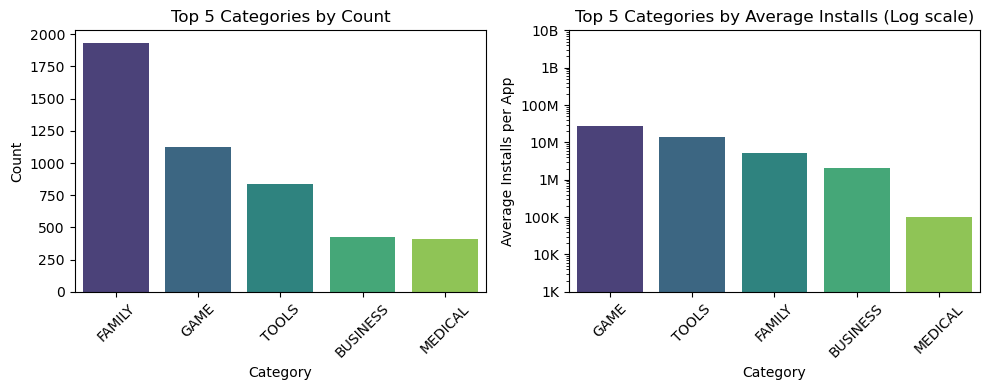

In [37]:

# Find the top 5 most frequent categories
top_5_categories = apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
apps_top_5 = apps[apps['Category'].isin(top_5_categories)]

# Calculate average installs by category
installs_avg = apps.groupby('Category')['Installs'].mean().reset_index()
top_5_installs_avg = installs_avg[installs_avg['Category'].isin(top_5_categories)].sort_values(by='Installs', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot top 5 categories by count
sns.countplot(data=apps_top_5, x='Category', order=top_5_categories, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Categories by Count')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot top 5 categories by average installs with log scale
sns.barplot(data=top_5_installs_avg, x='Category', y='Installs', ax=axes[1], palette='viridis')
axes[1].set_title('Top 5 Categories by Average Installs (Log scale)')
axes[1].set_ylabel('Average Installs per App')
axes[1].set_yscale('log')
axes[1].set_yticks([1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
axes[1].set_yticklabels(['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


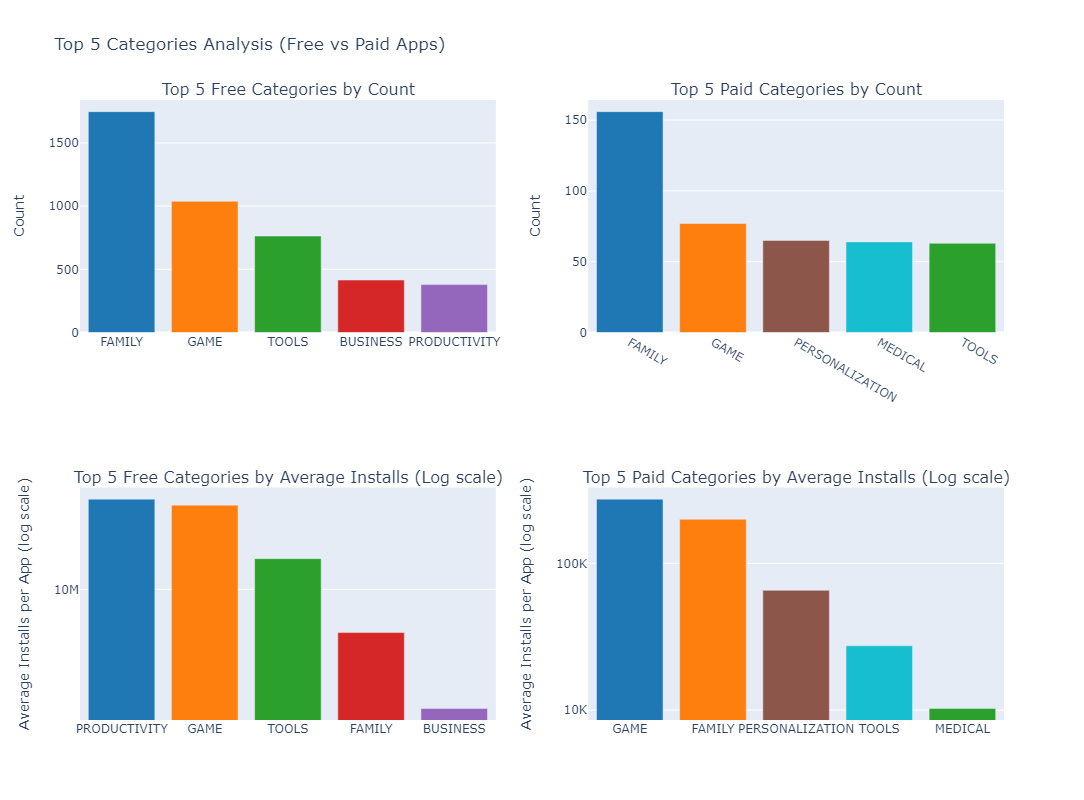

In [38]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs (Log scale)', 
    'Top 5 Paid Categories by Average Installs (Log scale)'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability and set y-axis to log scale for install plots
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)
fig.update_yaxes(title_text='Count', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=2)
fig.update_yaxes(title_text='Average Installs per App (log scale)', type='log', row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App (log scale)', type='log', row=2, col=2)
fig.update_yaxes(tickvals=[1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], ticktext=['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'], row=2, col=1)
fig.update_yaxes(tickvals=[1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10], ticktext=['1K', '10K', '100K', '1M', '10M', '100M', '1B', '10B'], row=2, col=2)

# Show the plot
fig.show()


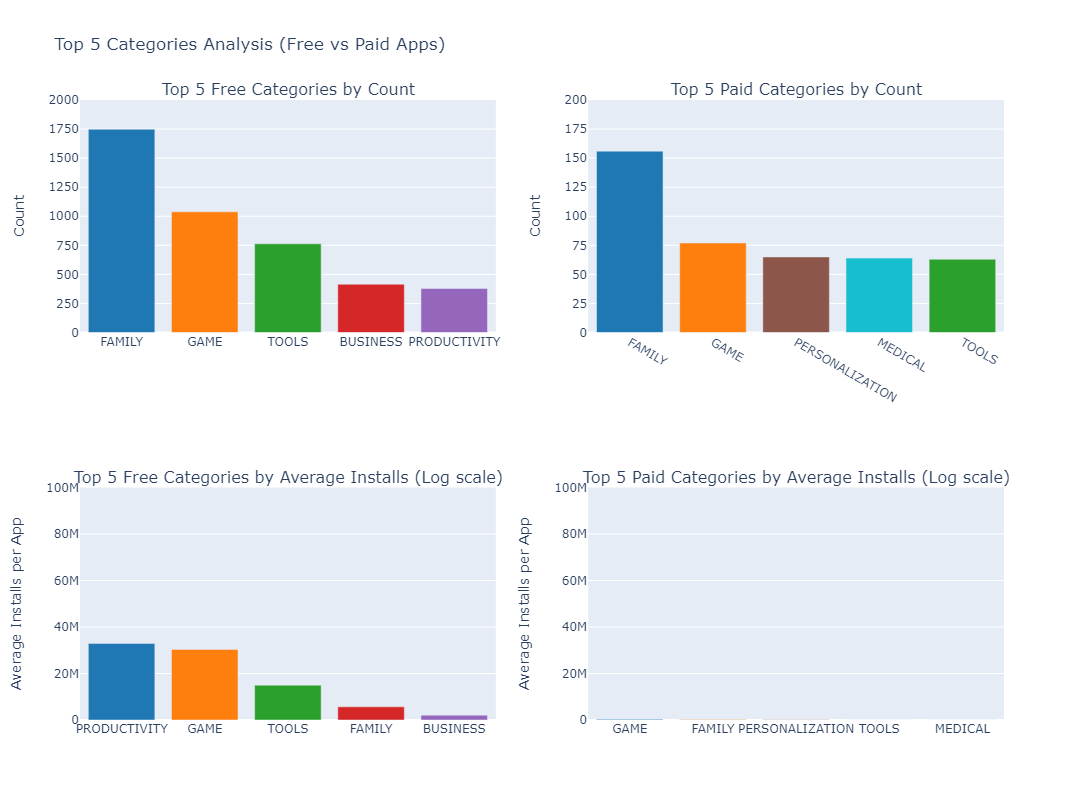

In [39]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs (Log scale)', 
    'Top 5 Paid Categories by Average Installs (Log scale)'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability and set y-axis to log scale for install plots
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)

# Update y-axes for the first row
fig.update_yaxes(title_text='Count', range=[0, 2000], dtick=250, row=1, col=1)
fig.update_yaxes(title_text='Count', range=[0, 200], dtick=25, row=1, col=2)

# Update y-axes for the second row
fig.update_yaxes(title_text='Average Installs per App', range=[0, 1e8], row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App', range=[0, 1e8], row=2, col=2)

# Show the plot
fig.show()


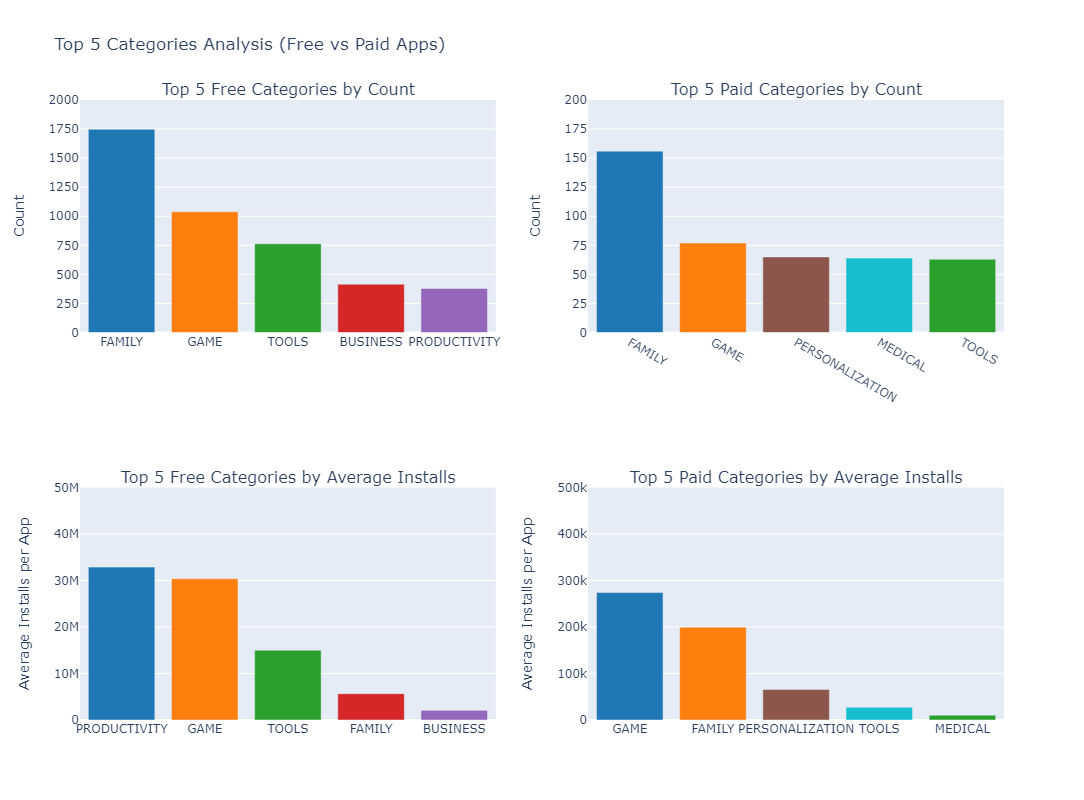

In [40]:

# Find the top 5 most frequent categories for paid and free apps
top_5_paid_categories = paid_apps['Category'].value_counts().head(5).index
top_5_free_categories = free_apps['Category'].value_counts().head(5).index

# Filter the data for the top 5 categories
paid_apps_top_5 = paid_apps[paid_apps['Category'].isin(top_5_paid_categories)]
free_apps_top_5 = free_apps[free_apps['Category'].isin(top_5_free_categories)]

# Calculate average installs by category for free apps
free_installs_avg = free_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_free_installs_avg = free_installs_avg[free_installs_avg['Category'].isin(top_5_free_categories)].sort_values(by='Installs', ascending=False)

# Calculate average installs by category for paid apps
paid_installs_avg = paid_apps.groupby('Category')['Installs'].mean().reset_index()
top_5_paid_installs_avg = paid_installs_avg[paid_installs_avg['Category'].isin(top_5_paid_categories)].sort_values(by='Installs', ascending=False)

# Define colors for the categories
category_colors = {
    'FAMILY': '#1f77b4',
    'GAME': '#ff7f0e',
    'TOOLS': '#2ca02c',
    'BUSINESS': '#d62728',
    'PRODUCTIVITY': '#9467bd',
    'PERSONALIZATION': '#8c564b',
    'COMMUNICATION': '#e377c2',
    'SOCIAL': '#7f7f7f',
    'PHOTOGRAPHY': '#bcbd22',
    'MEDICAL': '#17becf'
}

# Map colors to categories
free_colors = [category_colors[category] for category in top_5_free_categories]
paid_colors = [category_colors[category] for category in top_5_paid_categories]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=(
    'Top 5 Free Categories by Count', 
    'Top 5 Paid Categories by Count', 
    'Top 5 Free Categories by Average Installs', 
    'Top 5 Paid Categories by Average Installs'
))

# Add bar plot for top 5 free categories by count
fig.add_trace(
    go.Bar(x=top_5_free_categories, y=free_apps_top_5['Category'].value_counts().loc[top_5_free_categories], marker_color=free_colors),
    row=1, col=1
)

# Add bar plot for top 5 paid categories by count
fig.add_trace(
    go.Bar(x=top_5_paid_categories, y=paid_apps_top_5['Category'].value_counts().loc[top_5_paid_categories], marker_color=paid_colors),
    row=1, col=2
)

# Add bar plot for top 5 free categories by average installs
fig.add_trace(
    go.Bar(x=top_5_free_installs_avg['Category'], y=top_5_free_installs_avg['Installs'], marker_color=free_colors),
    row=2, col=1
)

# Add bar plot for top 5 paid categories by average installs
fig.add_trace(
    go.Bar(x=top_5_paid_installs_avg['Category'], y=top_5_paid_installs_avg['Installs'], marker_color=paid_colors),
    row=2, col=2
)

# Update layout for better readability
fig.update_layout(title_text='Top 5 Categories Analysis (Free vs Paid Apps)', showlegend=False, height=800)

# Update y-axes for the first row
fig.update_yaxes(title_text='Count', range=[0, 2000], dtick=250, row=1, col=1)
fig.update_yaxes(title_text='Count', range=[0, 200], dtick=25, row=1, col=2)

# Update y-axes for the second row
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e7], row=2, col=1)
fig.update_yaxes(title_text='Average Installs per App', range=[0, 5e5], row=2, col=2)

# Show the plot
fig.show()


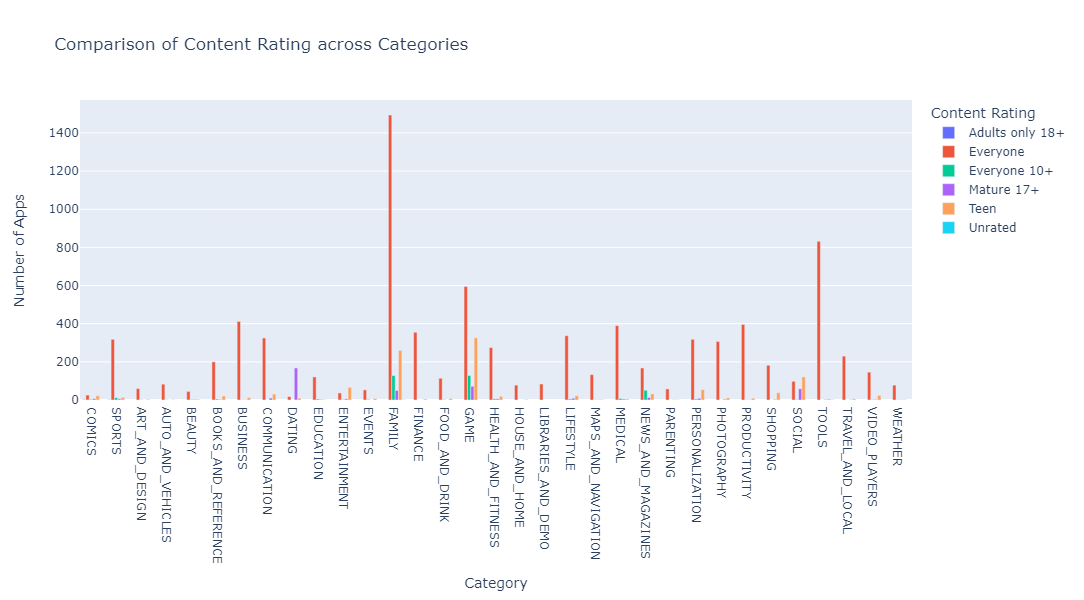

In [41]:

# Create a dataframe for content rating analysis
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# Create a bar plot to compare Content Rating across Categories
fig = px.bar(content_rating_analysis, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# Show the plot
fig.show()


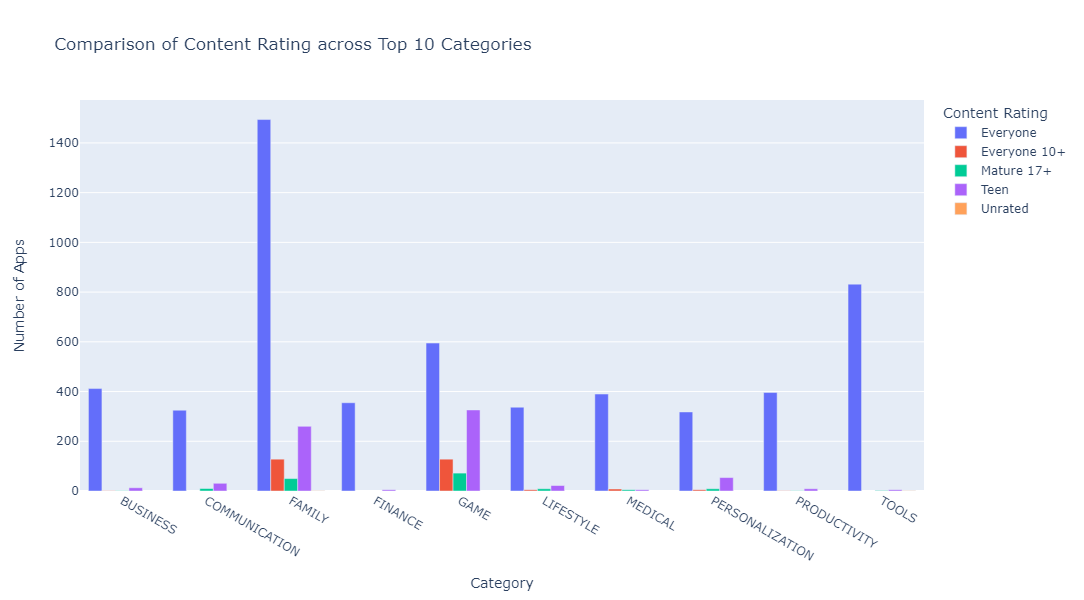

In [42]:

# Create a dataframe for content rating analysis
content_rating_analysis = apps.groupby(['Content Rating', 'Category']).size().reset_index(name='Count')

# Get the top 10 categories by total number of apps
top_categories = apps['Category'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 categories
content_rating_analysis_top = content_rating_analysis[content_rating_analysis['Category'].isin(top_categories)]

# Create a bar plot to compare Content Rating across top 10 Categories
fig = px.bar(content_rating_analysis_top, 
             x='Category', 
             y='Count', 
             color='Content Rating',
             title='Comparison of Content Rating across Top 10 Categories',
             labels={'Count': 'Number of Apps'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Content Rating')

# Show the plot
fig.show()


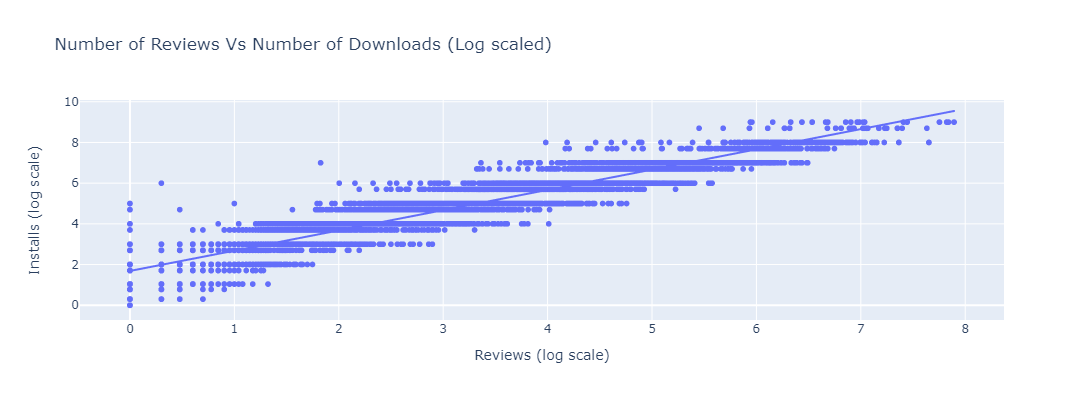

In [43]:

# חישוב ערכי הלוג עבור Reviews ו-Installs
reviews_log = np.log10(apps['Reviews'] + 1)
installs_log = np.log10(apps['Installs'] + 1)

# יצירת גרף פיזור עם ערכי לוג
fig = px.scatter(x=reviews_log, y=installs_log, trendline='ols',
                 title='Number of Reviews Vs Number of Downloads (Log scaled)',
                 labels={'x': 'Reviews (log scale)', 'y': 'Installs (log scale)'})

fig.update_layout(width=600, height=400)

# הצגת הגרף
fig.show()


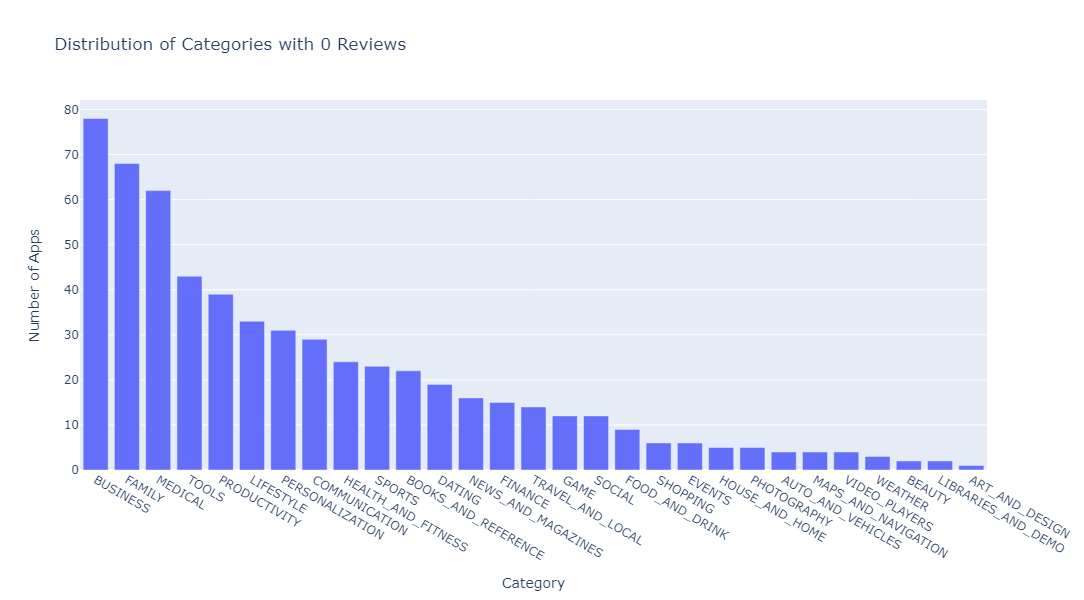

In [44]:

# Filter the dataframe to include only apps with 0 reviews
zero_reviews_apps = apps[apps['Reviews'] == 0]

# Create a dataframe for the distribution of categories with 0 reviews
zero_reviews_distribution = zero_reviews_apps['Category'].value_counts().reset_index()
zero_reviews_distribution.columns = ['Category', 'Count']

# Create a bar plot to show the distribution of categories with 0 reviews
fig = px.bar(zero_reviews_distribution, 
             x='Category', 
             y='Count', 
             title='Distribution of Categories with 0 Reviews',
             labels={'Count': 'Number of Apps', 'Category': 'Category'},
             height=600)

# Update layout for better readability
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Number of Apps',
                  legend_title='Category',
                  width=800, height=600)

# Show the plot
fig.show()


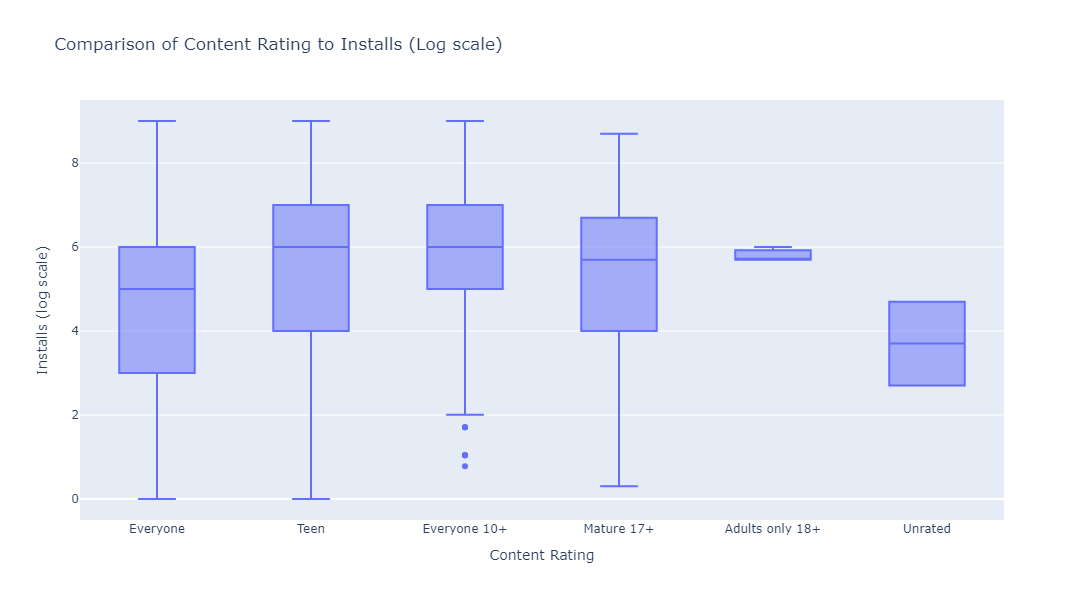

In [45]:

# הוספת קבוע קטן כדי להימנע מהתייחסות ל-log(0) וביצוע חישוב ה-log
installs_log = np.log10(apps['Installs'] + 1)

# יצירת גרף קופסה להשוואה בין דירוג התוכן להורדות עם סולם לוגריתמי
fig = px.box(apps, x='Content Rating', y=installs_log,
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'y': 'Installs (log scale)', 'Content Rating': 'Content Rating'},
             height=600)

# עדכון העיצוב לנראות טובה יותר
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  width=800, height=600)

# הצגת הגרף
fig.show()


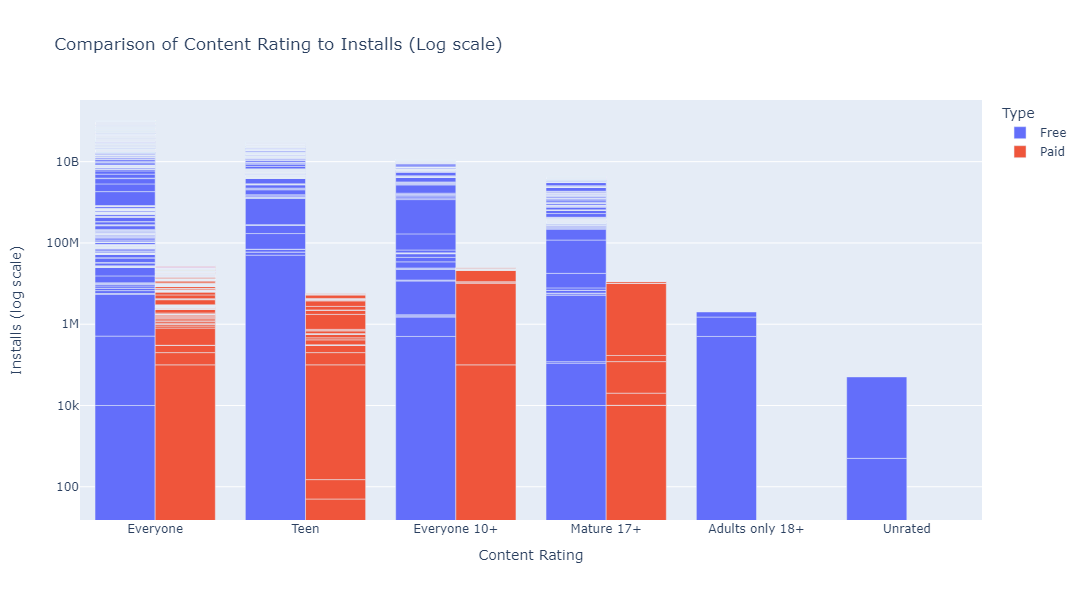

In [46]:

# יצירת גרף עמודות להשוואה בין דירוג התוכן להורדות, מופרד לפי סוג, עם סולם לוגריתמי
fig = px.bar(apps, x='Content Rating', y='Installs', color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'Installs': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# עדכון העיצוב לנראות טובה יותר והגדרת ציר ה-y ללוגריתמי
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# הצגת הגרף
fig.show()


<Axes: xlabel='Content Rating', ylabel='Installs'>

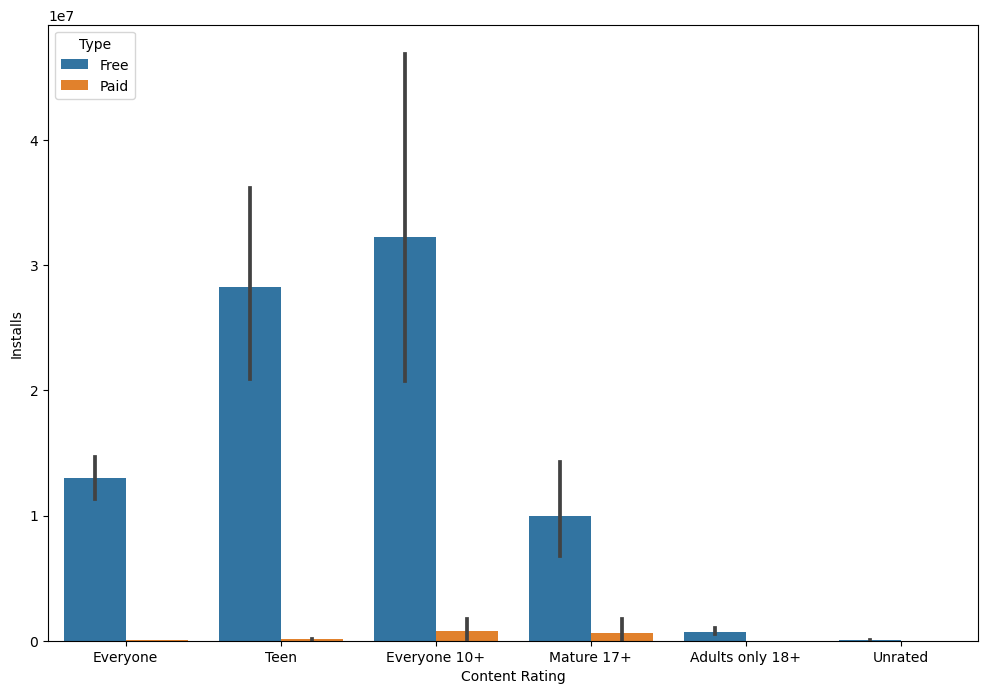

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=apps)

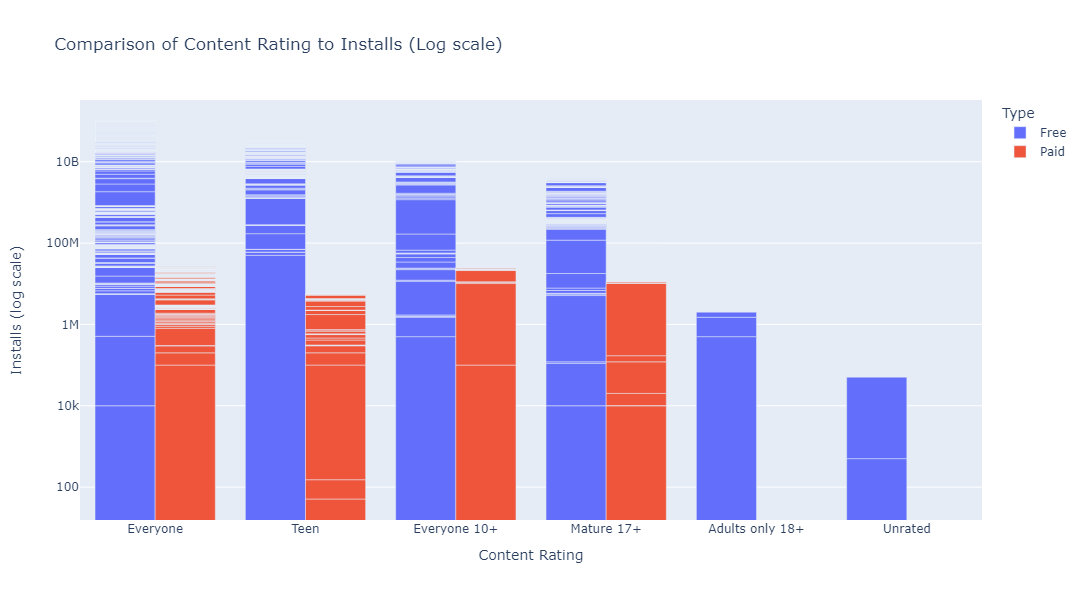

In [48]:

# יצירת גרף עמודות להשוואה בין דירוג התוכן להורדות, מופרד לפי סוג, עם סולם לוגריתמי
fig = px.bar(apps, x='Content Rating', y=apps['Installs'] + 1, color='Type', barmode='group',
             title='Comparison of Content Rating to Installs (Log scale)',
             labels={'y': 'Installs', 'Content Rating': 'Content Rating'},
             height=600)

# עדכון העיצוב לנראות טובה יותר והגדרת ציר ה-y ללוגריתמי
fig.update_layout(xaxis_title='Content Rating',
                  yaxis_title='Installs (log scale)',
                  yaxis_type='log',
                  width=800, height=600)

# הצגת הגרף
fig.show()


In [49]:

free = free_apps['Category'].value_counts().sort_index().to_frame()
paid = paid_apps['Category'].value_counts().sort_index().to_frame()
total = apps['Category'].value_counts().sort_index().to_frame()
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']
fig = free.join(paid).join(total)
fig['%paid'] = fig['paid'] * 100 / fig['total']
fig['%free'] = fig['free'] * 100 / fig['total']
fig['%paid_of_total_paid'] = fig['paid'] * 100 / fig['paid'].sum()
fig['%free_of_total_free'] = fig['free'] * 100 / fig['free'].sum()

fig = fig.sort_values('paid')
fig

free   paid  total      %paid       %free  \
Category                                                         
AUTO_AND_VEHICLES      82    1.0     85   1.176471   96.470588   
SOCIAL                277    2.0    280   0.714286   98.928571   
SHOPPING              221    2.0    223   0.896861   99.103139   
PARENTING              58    2.0     60   3.333333   96.666667   
ENTERTAINMENT         109    2.0    111   1.801802   98.198198   
NEWS_AND_MAGAZINES    262    2.0    264   0.757576   99.242424   
FOOD_AND_DRINK        122    2.0    124   1.612903   98.387097   
ART_AND_DESIGN         61    3.0     64   4.687500   95.312500   
DATING                189    4.0    196   2.040816   96.428571   
EDUCATION             126    4.0    130   3.076923   96.923077   
VIDEO_PLAYERS         171    4.0    175   2.285714   97.714286   
MAPS_AND_NAVIGATION   132    5.0    137   3.649635   96.350365   
WEATHER                74    7.0     82   8.536585   90.243902   
BOOKS_AND_REFERENCE   201    8.0    229   3.493450   87.772926   
TRAVEL_AND_LOCAL      225    8.0    237   3.375527   94.936709   
BUSINESS              415    9.0    427   2.107728   97.189696   
HEALTH_AND_FITNESS    291   11.0    306   3.594771   95.098039   
FINANCE               343   13.0    360   3.611111   95.277778   
PHOTOGRAPHY           302   16.0    322   4.968944   93.788820   
PRODUCTIVITY          379   18.0    407   4.422604   93.120393   
LIFESTYLE             354   18.0    373   4.825737   94.906166   
COMMUNICATION         339   22.0    366   6.010929   92.622951   
SPORTS                327   22.0    351   6.267806   93.162393   
TOOLS                 763   63.0    840   7.500000   90.833333   
MEDICAL               324   64.0    408  15.686275   79.411765   
PERSONALIZATION       305   65.0    386  16.839378   79.015544   
GAME                 1038   77.0   1121   6.868867   92.595897   
FAMILY               1748  156.0   1933   8.070357   90.429384   
BEAUTY                 53    NaN     53        NaN  100.000000   
COMICS                 60    NaN     60        NaN  100.000000   
EVENTS                 63    NaN     64        NaN   98.437500   
HOUSE_AND_HOME         80    NaN     80        NaN  100.000000   
LIBRARIES_AND_DEMO     83    NaN     84        NaN   98.809524   

                     %paid_of_total_paid  %free_of_total_free  
Category                                                       
AUTO_AND_VEHICLES               0.163934             0.856218  
SOCIAL                          0.327869             2.892346  
SHOPPING                        0.327869             2.307612  
PARENTING                       0.327869             0.605618  
ENTERTAINMENT                   0.327869             1.138143  
NEWS_AND_MAGAZINES              0.327869             2.735721  
FOOD_AND_DRINK                  0.327869             1.273885  
ART_AND_DESIGN                  0.491803             0.636943  
DATING                          0.655738             1.973478  
EDUCATION                       0.655738             1.315652  
VIDEO_PLAYERS                   0.655738             1.785528  
MAPS_AND_NAVIGATION             0.819672             1.378302  
WEATHER                         1.147541             0.772685  
BOOKS_AND_REFERENCE             1.311475             2.098778  
TRAVEL_AND_LOCAL                1.311475             2.349379  
BUSINESS                        1.475410             4.333299  
HEALTH_AND_FITNESS              1.803279             3.038530  
FINANCE                         2.131148             3.581497  
PHOTOGRAPHY                     2.622951             3.153388  
PRODUCTIVITY                    2.950820             3.957398  
LIFESTYLE                       2.950820             3.696356  
COMMUNICATION                   3.606557             3.539731  
SPORTS                          3.606557             3.414430  
TOOLS                          10.327869             7.967004  
MEDICAL                        10.491803      

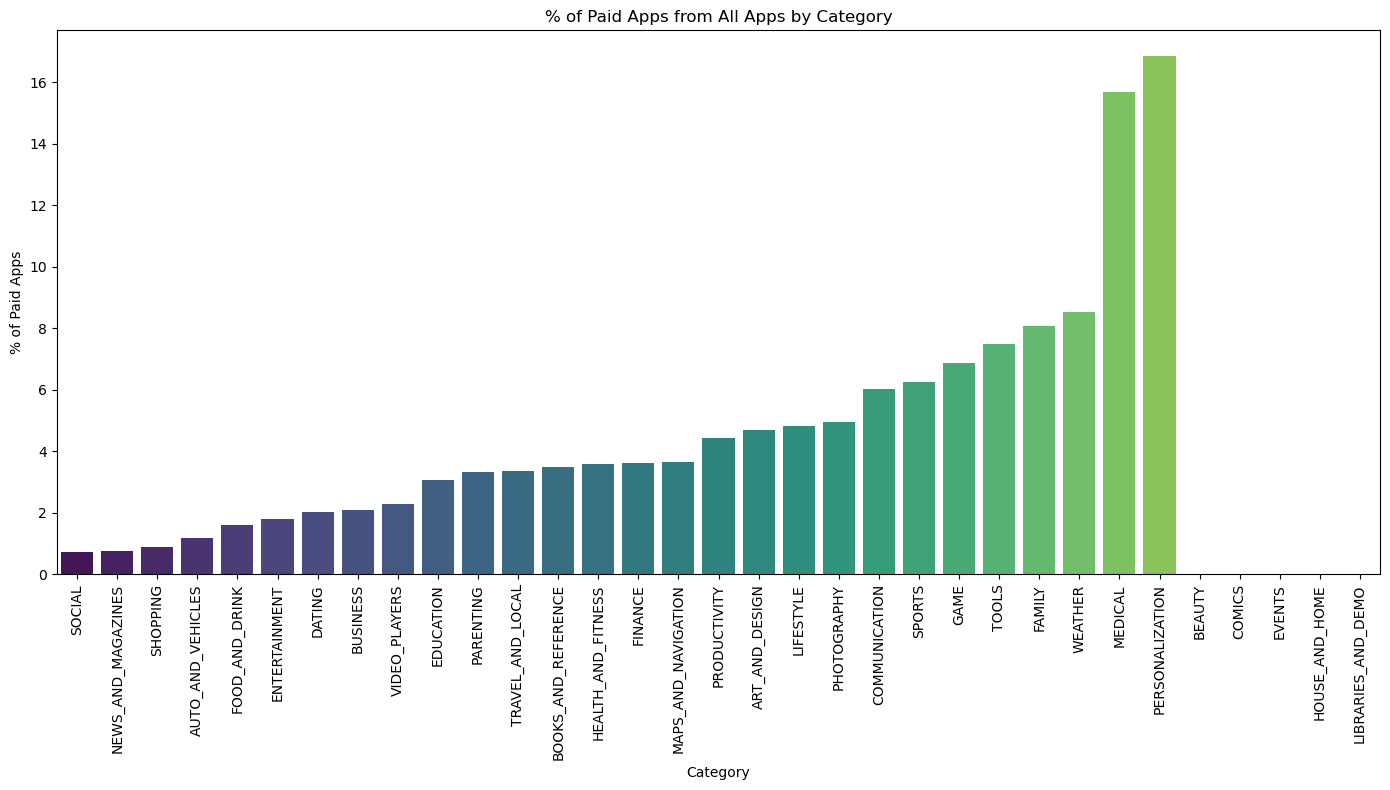

In [50]:

# Count categories for free and paid apps
free = free_apps['Category'].value_counts().sort_index().to_frame()
paid = paid_apps['Category'].value_counts().sort_index().to_frame()
total = apps['Category'].value_counts().sort_index().to_frame()

# Rename columns
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']

# Join dataframes
fig = free.join(paid).join(total)

# Calculate percentages
fig['%paid'] = fig['paid'] * 100 / fig['total']

# Resetting the index for proper columns
fig_reset = fig.reset_index()

# Renaming 'index' column to 'Category' for proper plotting
fig_reset.rename(columns={'index': 'Category'}, inplace=True)

# Sorting the dataframe by %paid from smallest to largest
fig_reset = fig_reset.sort_values(by='%paid')

# Creating the chart
plt.figure(figsize=(14, 8))
chart = sns.barplot(data=fig_reset, x='Category', y='%paid', palette="viridis")
plt.title('% of Paid Apps from All Apps by Category')
plt.xlabel('Category')
plt.ylabel('% of Paid Apps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


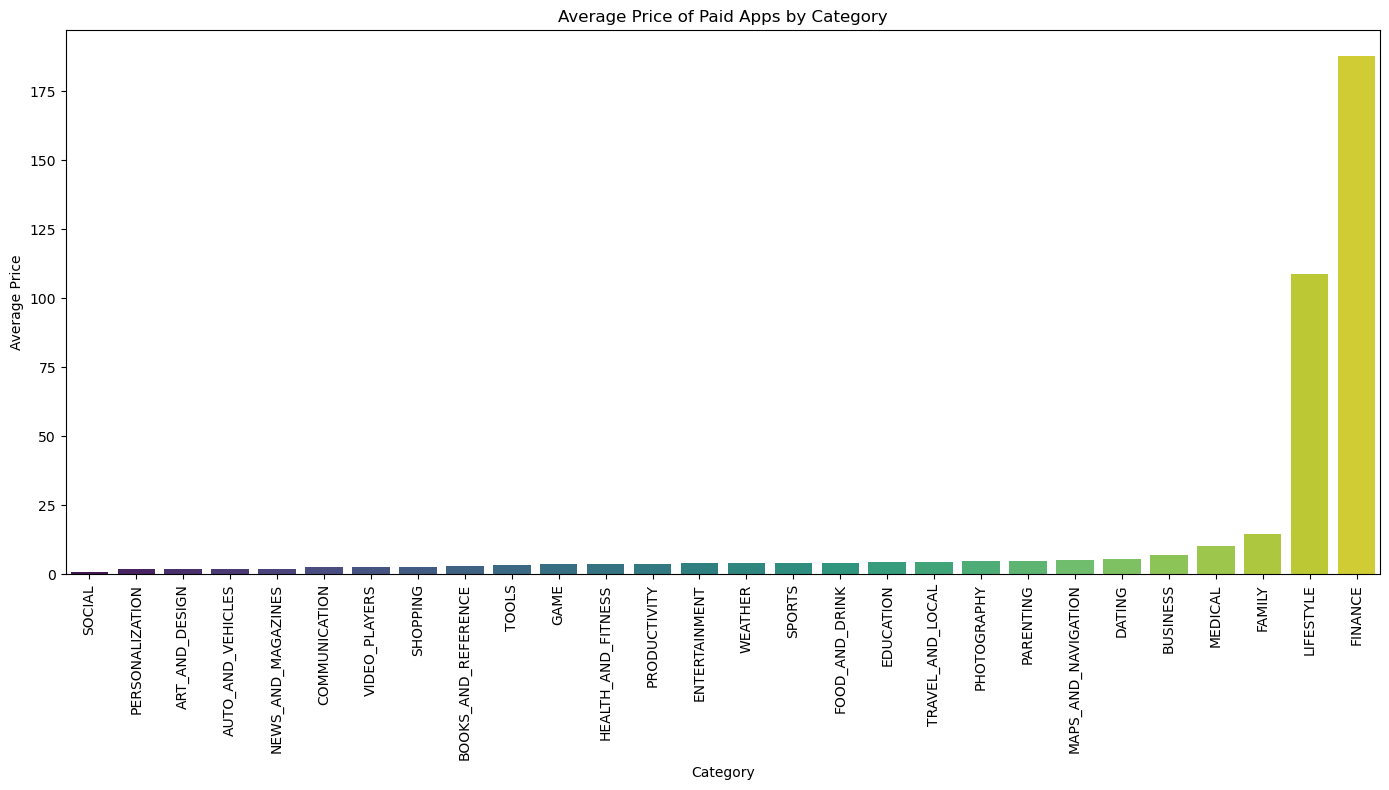

In [51]:

# Calculate average price per category
average_price_per_category = paid_apps.groupby('Category')['Price'].mean().reset_index()

# Sort the dataframe by average price from smallest to largest
average_price_per_category = average_price_per_category.sort_values(by='Price')

# Creating the chart
plt.figure(figsize=(14, 8))
price_chart = sns.barplot(data=average_price_per_category, x='Category', y='Price', palette="viridis")
plt.title('Average Price of Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


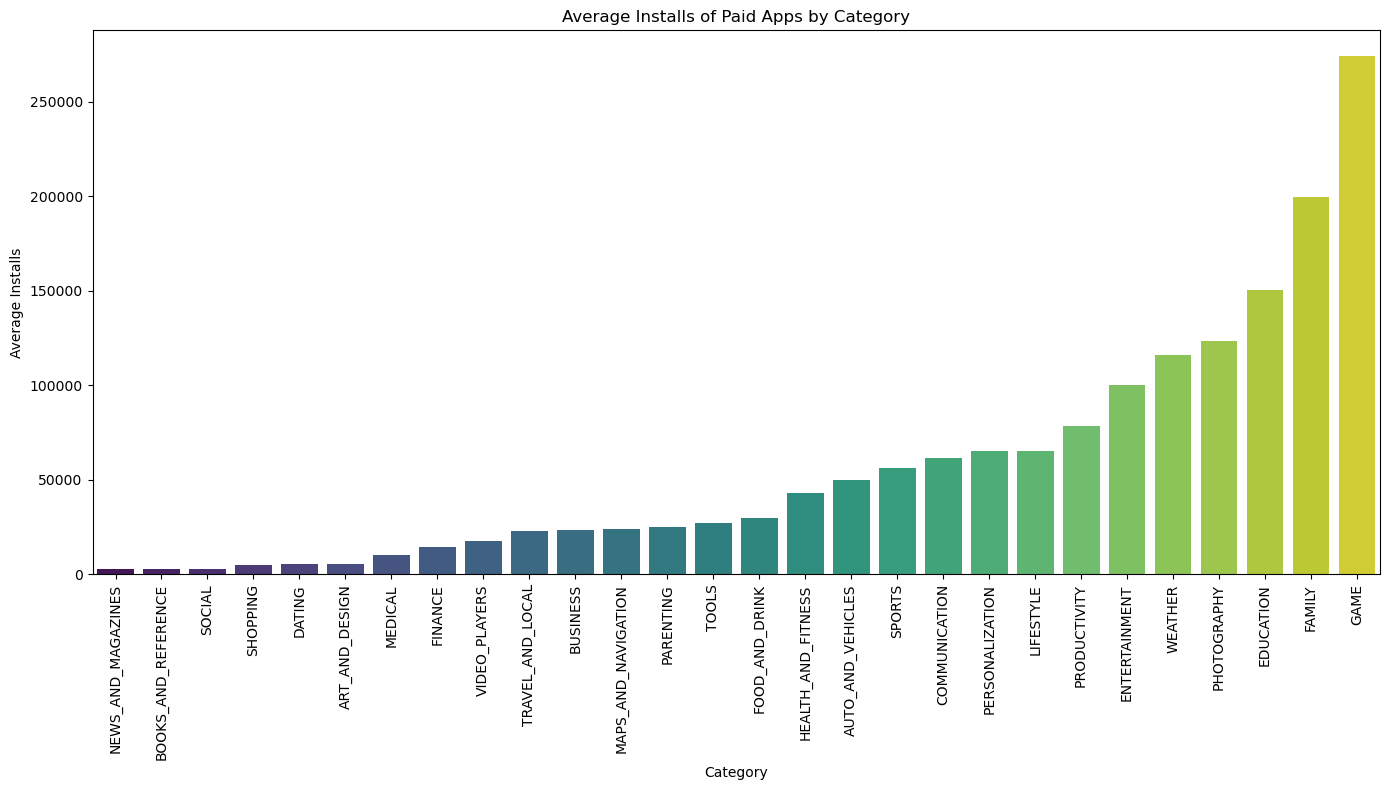

In [52]:

# Calculate average installs per category
average_installs_per_category = paid_apps.groupby('Category')['Installs'].mean().reset_index()

# Sort the dataframe by average installs from smallest to largest
average_installs_per_category = average_installs_per_category.sort_values(by='Installs')

# Creating the chart
plt.figure(figsize=(14, 8))
installs_chart = sns.barplot(data=average_installs_per_category, x='Category', y='Installs', palette="viridis")
plt.title('Average Installs of Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


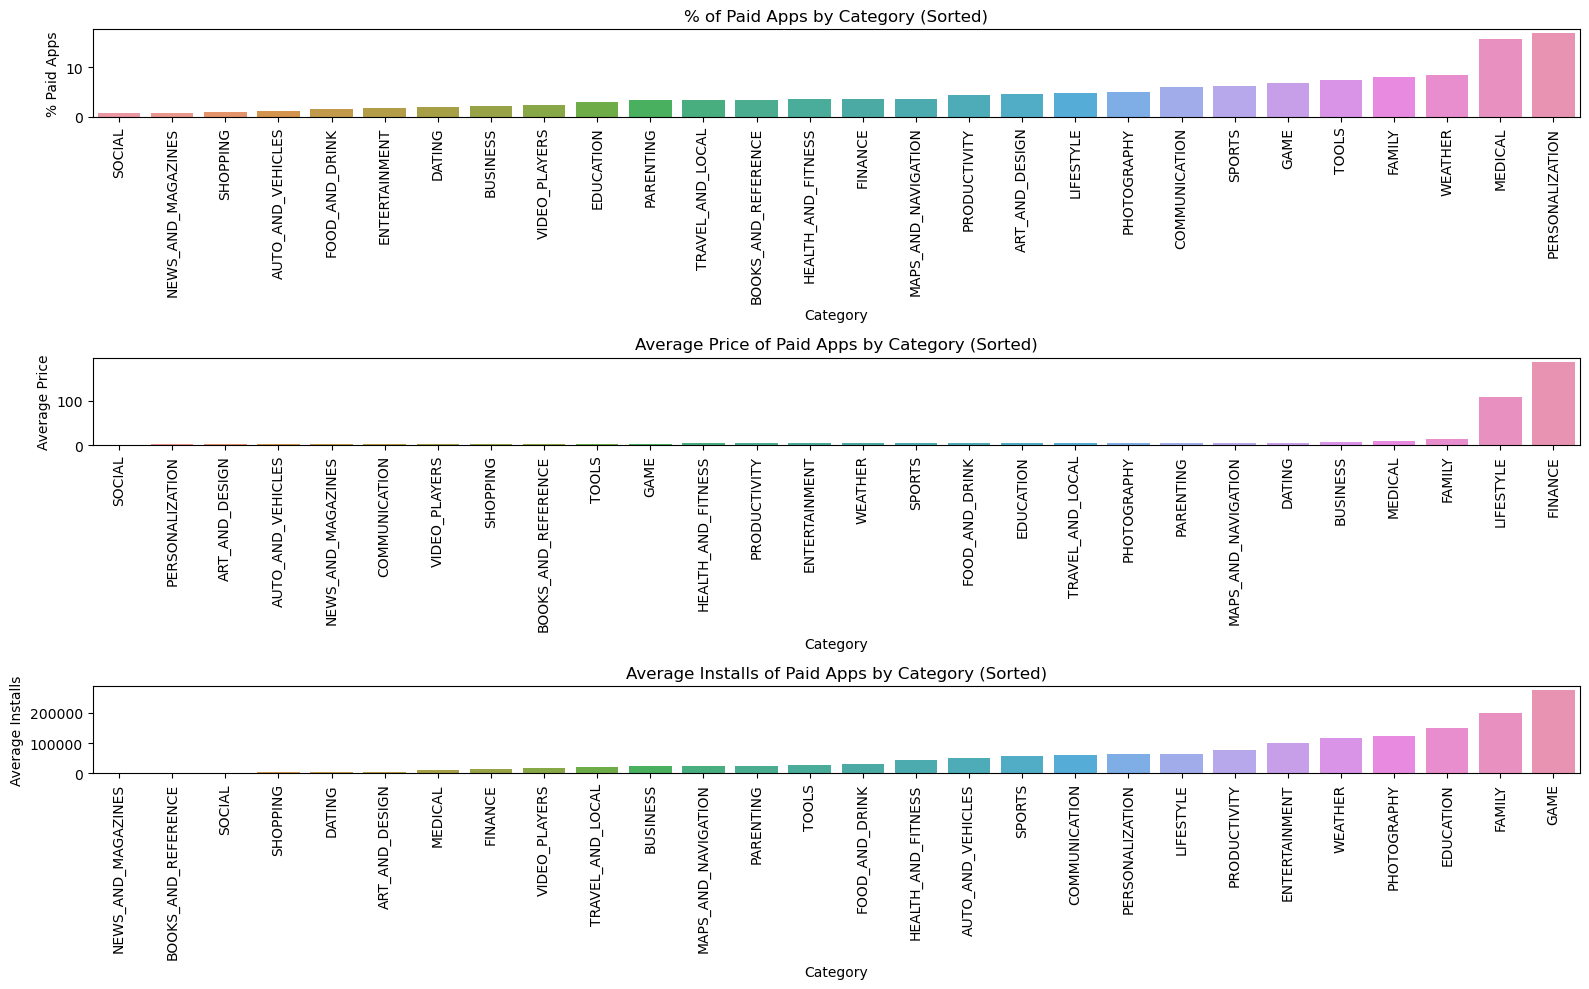

In [53]:

# Calculate average price per category
average_price_per_category = paid_apps.groupby('Category')['Price'].mean().reset_index()

# Calculate average installs per category
average_installs_per_category = paid_apps.groupby('Category')['Installs'].mean().reset_index()

# Count categories for free and paid apps
free = free_apps['Category'].value_counts().sort_index().to_frame()
paid = paid_apps['Category'].value_counts().sort_index().to_frame()
total = apps['Category'].value_counts().sort_index().to_frame()

# Rename columns
free.columns = ['free']
paid.columns = ['paid']
total.columns = ['total']

# Join dataframes
fig = free.join(paid).join(total)

# Calculate percentages
fig['%paid'] = fig['paid'] * 100 / fig['total']

# Resetting the index for proper columns
fig_reset = fig.reset_index()


# Merge the dataframes
merged_df = fig_reset.merge(average_price_per_category, on='Category').merge(average_installs_per_category, on='Category')

# Renaming columns for clarity
merged_df.rename(columns={'Price': 'Average Price', 'Installs': 'Average Installs'}, inplace=True)

# Sorting the data for each parameter from lowest to highest
sorted_by_paid = merged_df.sort_values(by='%paid')
sorted_by_price = merged_df.sort_values(by='Average Price')
sorted_by_installs = merged_df.sort_values(by='Average Installs')

# Plotting bar charts for each parameter separately for better clarity, sorted
plt.figure(figsize=(16, 10))

# % Paid Apps
plt.subplot(3, 1, 1)
sns.barplot(data=sorted_by_paid, x='Category', y='%paid')
plt.title('% of Paid Apps by Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('% Paid Apps')
plt.xticks(rotation=90)

# Average Price
plt.subplot(3, 1, 2)
sns.barplot(data=sorted_by_price, x='Category', y='Average Price')
plt.title('Average Price of Paid Apps by Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

# Average Installs
plt.subplot(3, 1, 3)
sns.barplot(data=sorted_by_installs, x='Category', y='Average Installs')
plt.title('Average Installs of Paid Apps by Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Content Rating       Revenue
3           Teen  1.648015e+07
2     Mature 17+  1.894298e+07
1   Everyone 10+  1.502261e+08
0       Everyone  1.816447e+08

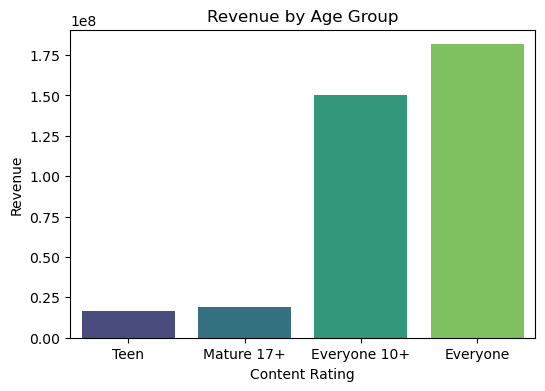

In [54]:

# Calculate revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']

# Analyze revenue by content rating (age)
revenue_by_age = paid_apps.groupby('Content Rating')['Revenue'].sum().reset_index().sort_values(by='Revenue')
display(revenue_by_age)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=revenue_by_age, x='Content Rating', y='Revenue', palette='viridis')
plt.title('Revenue by Age Group')
plt.xlabel('Content Rating')
plt.ylabel('Revenue')
plt.show()



Size Category       Revenue
4        100MB+  0.000000e+00
3      50-100MB  1.583045e+07
1       10-25MB  3.505808e+07
2       25-50MB  4.884419e+07
0        0-10MB  1.069576e+08

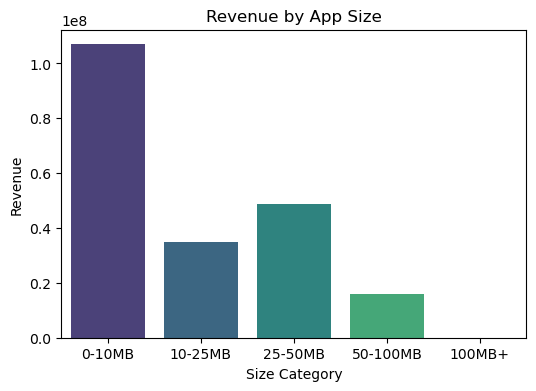

In [55]:
 # Analyze revenue by app size
size_bins = [0, 10, 25, 50, 100, float('inf')]
size_labels = ['0-10MB', '10-25MB', '25-50MB', '50-100MB', '100MB+']
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

revenue_by_size = paid_apps.groupby('Size Category')['Revenue'].sum().reset_index().sort_values(by='Revenue')
display(revenue_by_size)

    # Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=revenue_by_size, x= 'Size Category', y='Revenue', palette='viridis')
plt.title('Revenue by App Size')
plt.xlabel('Size Category')
plt.ylabel('Revenue')
plt.show()

Size Category       Revenue
1         30MB+  3.903987e+07
0        0-30MB  1.676504e+08

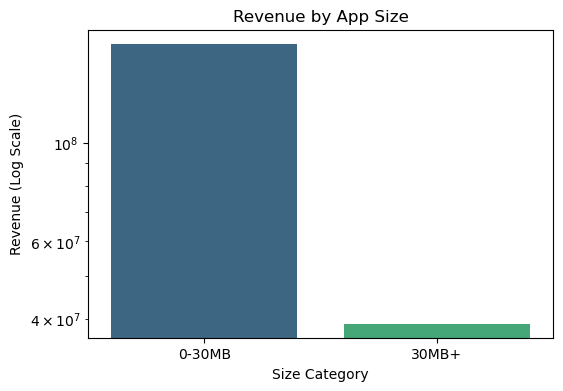

In [56]:
# Analyze revenue by app size with specific bins
size_bins = [0, 30, float('inf')]
size_labels = ['0-30MB', '30MB+']
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

revenue_by_size = paid_apps.groupby('Size Category')['Revenue'].sum().reset_index().sort_values(by='Revenue')
display(revenue_by_size)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=revenue_by_size, x='Size Category', y='Revenue', palette='viridis')
plt.yscale('log')  # שינוי הסקלה של ציר ה-Y לסקלה לוגריתמית
plt.title('Revenue by App Size')
plt.xlabel('Size Category')
plt.ylabel('Revenue (Log Scale)')
plt.show()

Size Category      Price
1         30MB+   7.531049
0        0-30MB  17.965636

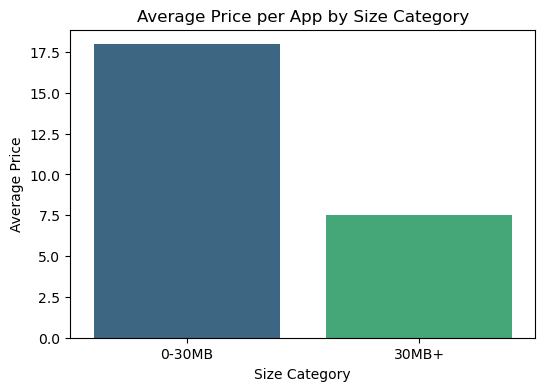

In [57]:
size_bins = [0, 30, float('inf')]
size_labels = ['0-30MB', '30MB+']
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

avg_price_by_size = paid_apps.groupby('Size Category')['Price'].mean().reset_index().sort_values(by='Price')
display(avg_price_by_size)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_price_by_size, x='Size Category', y='Price', palette='viridis')
plt.title('Average Price per App by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Average Price')
plt.show()

Size Category       Installs
0        0-30MB   71109.381546
1         30MB+  108412.027972

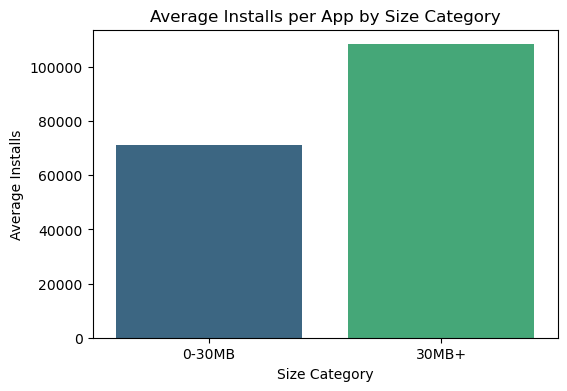

In [58]:
paid_apps['Size Category'] = pd.cut(paid_apps['Size_MB'], bins=size_bins, labels=size_labels)

avg_installs_by_size = paid_apps.groupby('Size Category')['Installs'].mean().reset_index().sort_values(by='Installs')
display(avg_installs_by_size)

# Plotting average installs
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_installs_by_size, x='Size Category', y='Installs', palette='viridis')
plt.title('Average Installs per App by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Average Installs')
plt.show()

Category       Revenue
22               SOCIAL  5.940000e+03
16   NEWS_AND_MAGAZINES  6.445000e+03
21             SHOPPING  3.014900e+04
0        ART_AND_DESIGN  3.184000e+04
5                DATING  8.758900e+04
2   BOOKS_AND_REFERENCE  8.890150e+04
1     AUTO_AND_VEHICLES  9.950000e+04
17            PARENTING  2.499590e+05
10       FOOD_AND_DRINK  2.844000e+05
26        VIDEO_PLAYERS  3.352900e+05
7         ENTERTAINMENT  7.980000e+05
3              BUSINESS  1.047648e+06
25     TRAVEL_AND_LOCAL  1.149250e+06
14  MAPS_AND_NAVIGATION  1.240789e+06
12   HEALTH_AND_FITNESS  1.420270e+06
6             EDUCATION  2.403980e+06
27              WEATHER  4.179885e+06
4         COMMUNICATION  4.247100e+06
20         PRODUCTIVITY  4.304452e+06
23               SPORTS  4.706154e+06
24                TOOLS  5.462910e+06
18      PERSONALIZATION  7.784820e+06
15              MEDICAL  8.371355e+06
19          PHOTOGRAPHY  8.941050e+06
9               FINANCE  2.572664e+07
11                 GAME  4.098684e+07
13            LIFESTYLE  5.758394e+07
8                FAMILY  1.857188e+08

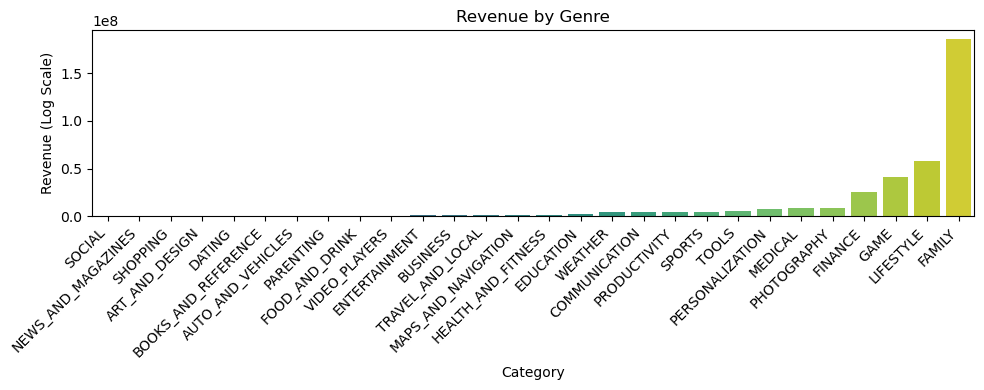

In [59]:
revenue_by_genre = paid_apps.groupby('Category')['Revenue'].sum().reset_index().sort_values(by='Revenue')
display(revenue_by_genre)
# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(data=revenue_by_genre, x='Category', y='Revenue', palette='viridis')
#plt.yscale('log')  # שינוי הסקלה של ציר ה-Y לסקלה לוגריתמית
plt.title('Revenue by Genre')
plt.xlabel('Category')
plt.ylabel('Revenue (Log Scale)')
plt.xticks(rotation=45, ha='right')  # סובב את הכותרות של ציר ה-X ב-45 מעלות
plt.tight_layout()  # התאמת הפריסה כדי להבטיח שהכותרות לא יחתכו
plt.show()